In [4]:
#read the CSV 

In [2]:
import pandas as pd

df = pd.read_excel("Incidents.xlsx")
df.head()


,Incident No.,Status,Reported Date,Incident Date,Department,Site,Brief Description,Activity Type,Type,Special Investigation Type,Highest Initial Risk Ranking,Supervisor / Line Mgr,Manager,Investigation Mgr,Investigation Due Date,Actions,Date Closed (mandatory if Close this Record? = Yes)
0,INC-1475522,Open,2025-12-08,2025-12-08,Cheyenne Operations - Complex 2,Cheyenne WY,PSLL-1330 does not trip NH3 feed pump,<Undefined>,<Undefined>,<Undefined>,0 - 0,"Kiemele, Trevor,",NaN,NaN,2026-01-07 00:00:00,NaN,NaN
1,INC-1475521,Open,2025-12-08,2025-12-08,Cheyenne Operations - Complex 2,Cheyenne WY,"P802B low lube pressure trip does not work, PS...",<Undefined>,<Undefined>,<Undefined>,0 - 0,"Kiemele, Trevor,",NaN,NaN,2026-01-07 00:00:00,NaN,NaN
2,INC-1475520,Open,2025-12-08,2025-12-08,Cheyenne Operations - Complex 2,Cheyenne WY,LAHH116 and PAHH-3 are currently in alarm.,<Undefined>,<Undefined>,<Undefined>,0 - 0,"Kiemele, Trevor,",NaN,NaN,2026-01-07 00:00:00,NaN,NaN
3,INC-1475501,Open,2025-12-08,2025-12-07,Cheyenne Operations - Complex 1,Cheyenne WY,M-505 load out conveyer had slight spill that ...,<Undefined>,<Undefined>,<Undefined>,0 - 0,"Moore, Cole,",NaN,NaN,NaN,NaN,NaN
4,INC-1475420,Open,2025-12-07,2025-12-07,Cheyenne Operations - Complex 1,Cheyenne WY,Heating system for Rotary Dryer Bull Gear lube...,<Undefined>,<Undefined>,<Undefined>,0 - 0,"Moore, Cole,",NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7554 entries, 0 to 7553
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Incident No.                                         7554 non-null   object        
 1   Status                                               7554 non-null   object        
 2   Reported Date                                        7554 non-null   datetime64[ns]
 3   Incident Date                                        7554 non-null   datetime64[ns]
 4   Department                                           7554 non-null   object        
 5   Site                                                 7554 non-null   object        
 6   Brief Description                                    7550 non-null   object        
 7   Activity Type                                        7554 non-null   object        
 8 

#### EDA

,Missing Count,Missing %
Investigation Due Date,7401,97.97
Investigation Mgr,6797,89.98
Actions,6765,89.56
Special Investigation Type,1146,15.17
Manager,119,1.58
Date Closed (mandatory if Close this Record? = Yes),66,0.87
Brief Description,4,0.05
Highest Initial Risk Ranking,1,0.01
Incident No.,0,0.00
Type,0,0.00


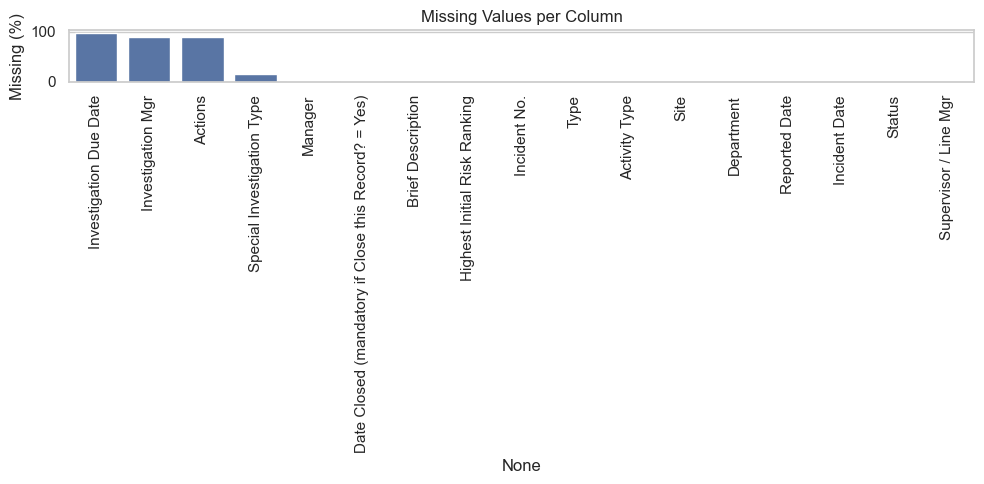

In [13]:
# 3) Missing values per column
missing_count = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing_count / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing %": missing_percent
})

display(missing_df)

# Bar plot of missing percentages
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_percent.index, y=missing_percent.values)
plt.xticks(rotation=90)
plt.ylabel("Missing (%)")
plt.title("Missing Values per Column")
plt.tight_layout()
plt.show()


C:\Users\sshaban\AppData\Local\Temp\ipykernel_27380\4121909464.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  incidents_by_month = df.set_index("Reported Date").resample("M")["Incident No."].count()


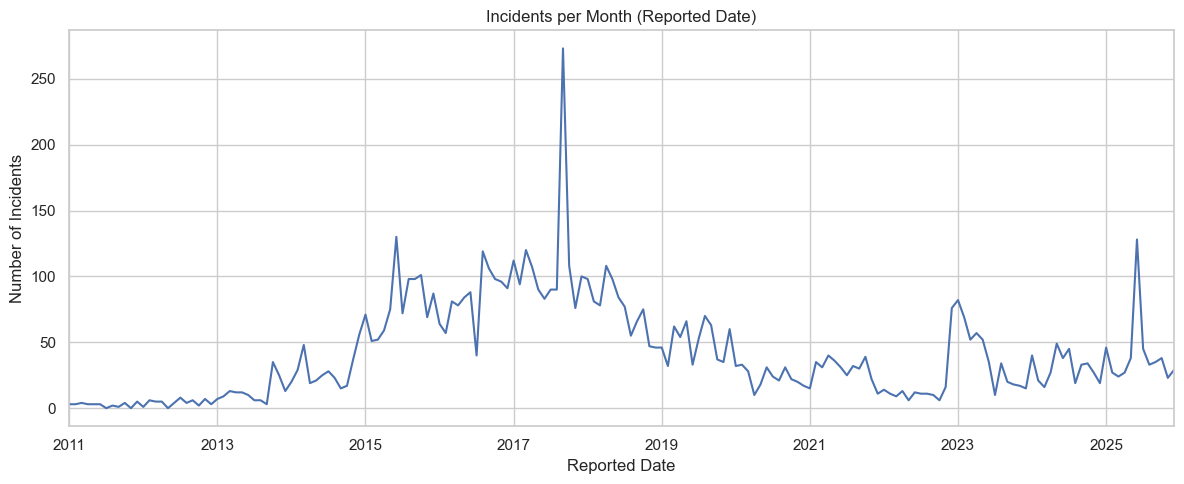

In [14]:
# 4) Incident trend over time (by Reported Date)
# Make sure it's datetime
df["Reported Date"] = pd.to_datetime(df["Reported Date"])

incidents_by_month = df.set_index("Reported Date").resample("M")["Incident No."].count()

plt.figure(figsize=(12, 5))
incidents_by_month.plot()
plt.ylabel("Number of Incidents")
plt.title("Incidents per Month (Reported Date)")
plt.tight_layout()
plt.show()


In [20]:
df = df.drop(columns=["Site"])


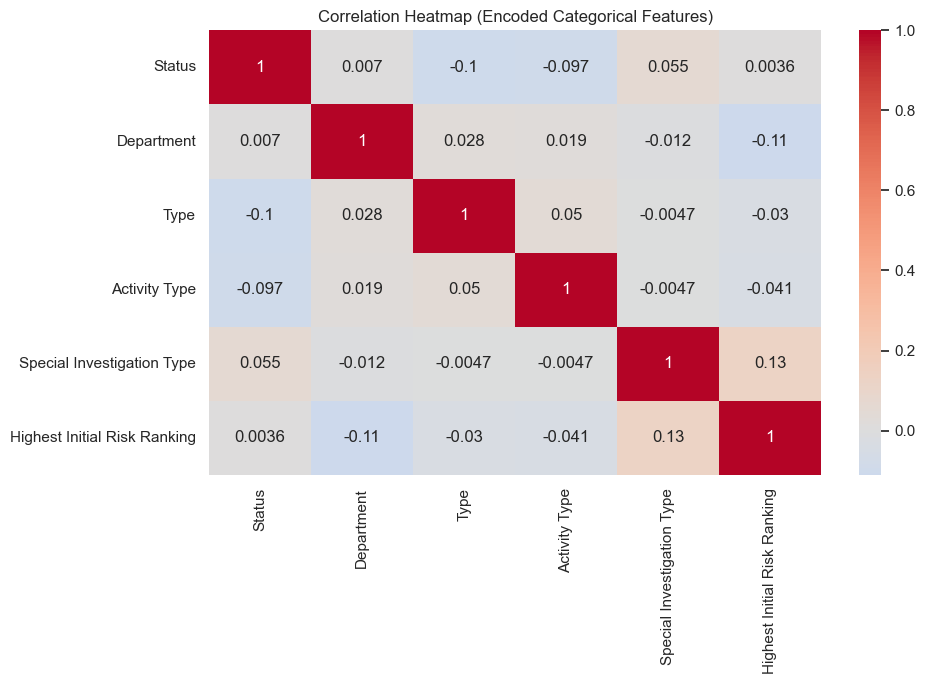

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Updated categorical feature list (Site removed)
cat_cols = [
    "Status",
    "Department",
    "Type",
    "Activity Type",
    "Special Investigation Type",
    "Highest Initial Risk Ranking"
]

# Keep only columns that exist in df
cat_cols = [c for c in cat_cols if c in df.columns]

# Encode categorical columns into numeric codes
df_cat = df[cat_cols].copy()
for col in cat_cols:
    df_cat[col] = df_cat[col].astype("category").cat.codes

# Compute correlation matrix
corr = df_cat.corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Encoded Categorical Features)")
plt.tight_layout()
plt.show()


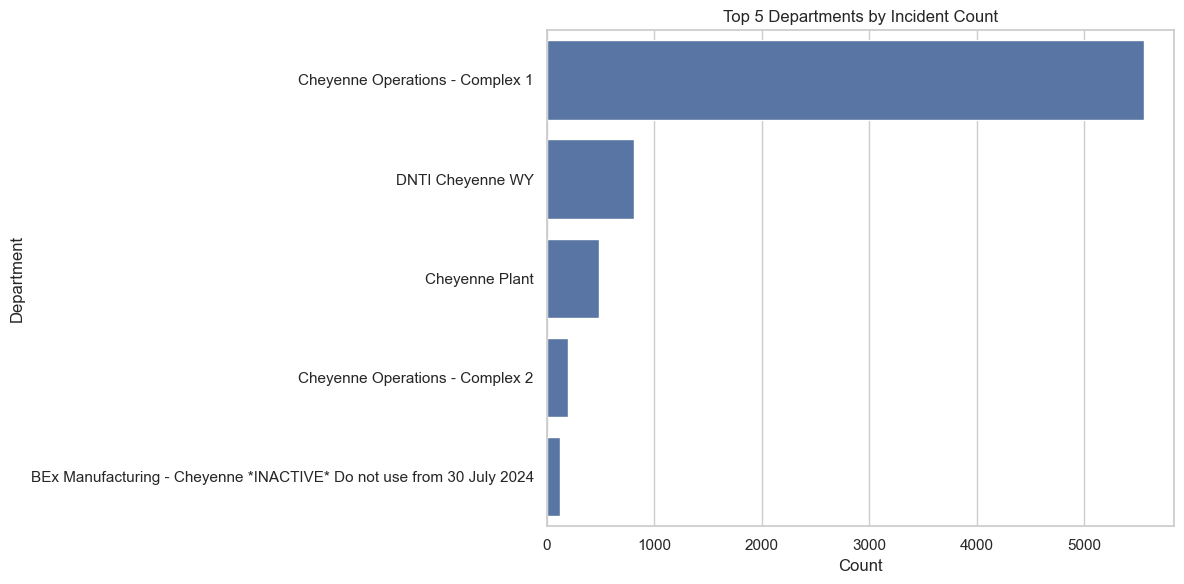

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 5 departments
top5_depts = df["Department"].value_counts().head(5)

plt.figure(figsize=(12, 6))
sns.countplot(
    y="Department",
    data=df[df["Department"].isin(top5_depts.index)],
    order=top5_depts.index
)
plt.title("Top 5 Departments by Incident Count")
plt.xlabel("Count")
plt.ylabel("Department")
plt.tight_layout()
plt.show()


In [32]:
import os
os.listdir()


['.ipynb_checkpoints', 'AI_Project.ipynb', 'Incidents.xlsx']

In [33]:
import pandas as pd

# Load your Excel file
df = pd.read_excel("Incidents.xlsx")

# Convert date columns to datetime (coerce errors to NaT)
df['Reported Date'] = pd.to_datetime(df['Reported Date'], errors='coerce')
df['Date Closed'] = pd.to_datetime(df['Date Closed (mandatory if Close this Record? = Yes)'], errors='coerce')

# Calculate how many days a ticket remains open
today = pd.Timestamp.today()
df['Days_Open'] = (df['Date Closed'].fillna(today) - df['Reported Date']).dt.days

# Average days open by Incident Type
avg_days_open = df.groupby('Type')['Days_Open'].mean().sort_values(ascending=False)

avg_days_open


Type
External {Non-IPL}    1157.051724
Incident                92.510092
Near Miss               33.641227
Hazard                   7.272967
<Undefined>              4.750000
Name: Days_Open, dtype: float64

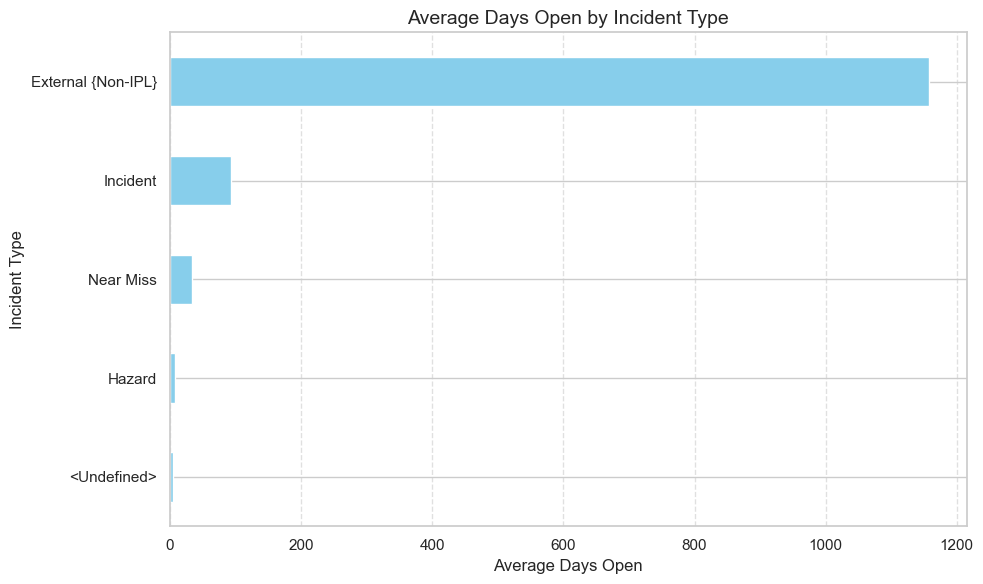

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel file
df = pd.read_excel("Incidents.xlsx")

# Convert dates to datetime
df['Reported Date'] = pd.to_datetime(df['Reported Date'], errors='coerce')
df['Date Closed'] = pd.to_datetime(df['Date Closed (mandatory if Close this Record? = Yes)'], errors='coerce')

# Calculate how many days a ticket remains open
today = pd.Timestamp.today()
df['Days_Open'] = (df['Date Closed'].fillna(today) - df['Reported Date']).dt.days

# Average days open by Incident Type
avg_days_open = df.groupby('Type')['Days_Open'].mean().sort_values(ascending=True)

# Create bar chart
plt.figure(figsize=(10, 6))
avg_days_open.plot(kind='barh', color='skyblue')

plt.title("Average Days Open by Incident Type", fontsize=14)
plt.xlabel("Average Days Open")
plt.ylabel("Incident Type")
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [37]:
#Clean & Preprocess the Text

In [38]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)   # remove punctuation numbers
    words = [w for w in text.split() if w not in stop_words and len(w) > 2]
    return " ".join(words)

df = pd.read_excel("Incidents.xlsx")

df["clean_desc"] = df["Brief Description"].fillna("").apply(clean_text)
df["clean_desc"].head(10)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sshaban\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


0                                  psll trip feed pump
1                     low lube pressure trip work psll
2                            lahh pahh currently alarm
3    load conveyer slight spill left unnoticed exte...
4    heating system rotary dryer bull gear lube oil...
5                  valve rendered unusable without moc
6    operator slipped fell ice roadway causing shou...
7    north chlorine cylinder regulator wisping chlo...
8    reporting stepping truck onto uneven ground em...
9                        inconsistent rpm north cooper
Name: clean_desc, dtype: object

In [39]:
#Word Frequency Analysis (What issues occur the most?)

C:\Users\sshaban\AppData\Local\Temp\ipykernel_27380\908038116.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x="count", y="word", palette="viridis")


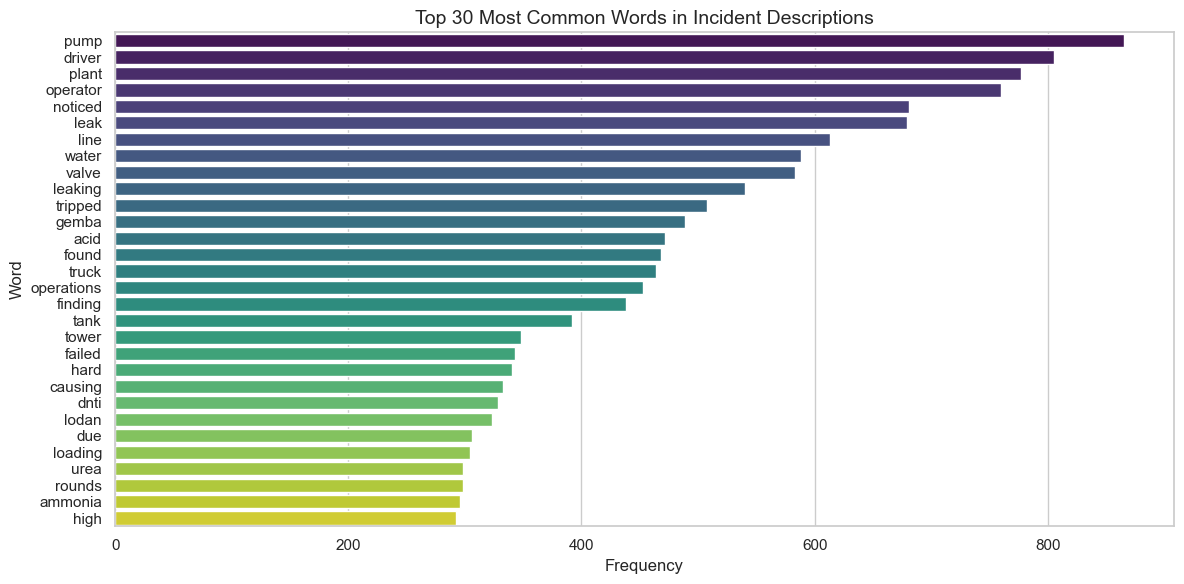

In [40]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all words
all_words = " ".join(df["clean_desc"]).split()

# Count most common 30 words
word_freq = Counter(all_words).most_common(30)

# Convert to DataFrame
freq_df = pd.DataFrame(word_freq, columns=["word", "count"])

plt.figure(figsize=(12, 6))
sns.barplot(data=freq_df, x="count", y="word", palette="viridis")

plt.title("Top 30 Most Common Words in Incident Descriptions", fontsize=14)
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()


In [41]:
#STEP 3 — Bigram Analysis (Two-word phrases)

C:\Users\sshaban\AppData\Local\Temp\ipykernel_27380\3150329945.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bigram_df, x="count", y="bigram", palette="plasma")


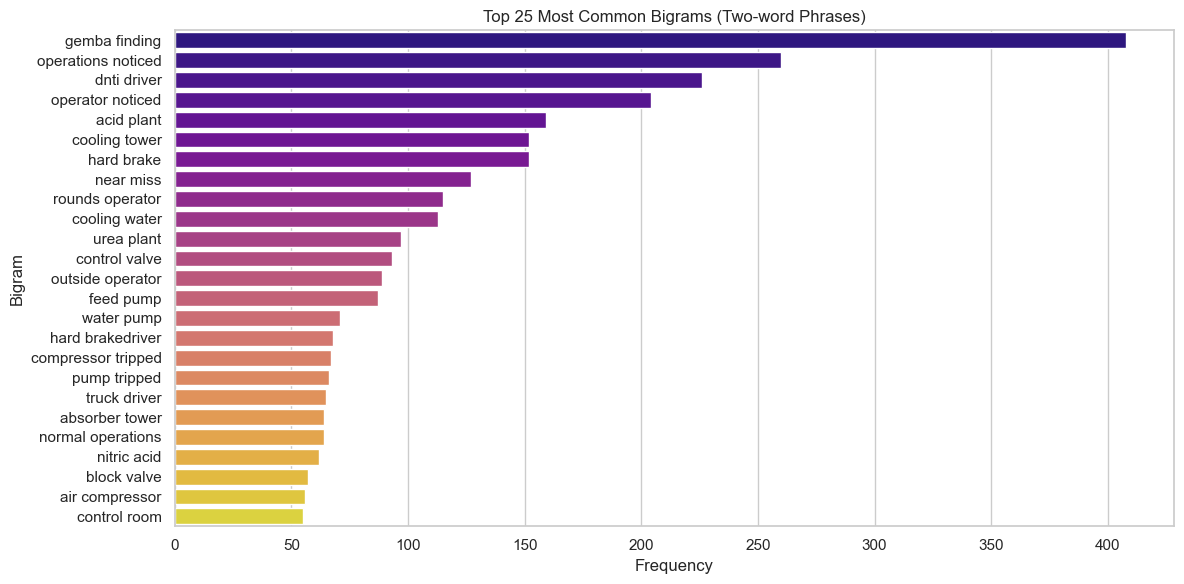

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(df["clean_desc"])

sum_words = X.sum(axis=0)
bigrams = [(word, sum_words[0, idx]) 
           for word, idx in vectorizer.vocabulary_.items()]
bigrams = sorted(bigrams, key=lambda x: x[1], reverse=True)[:25]

bigram_df = pd.DataFrame(bigrams, columns=["bigram", "count"])

plt.figure(figsize=(12, 6))
sns.barplot(data=bigram_df, x="count", y="bigram", palette="plasma")
plt.title("Top 25 Most Common Bigrams (Two-word Phrases)")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()


C:\Users\sshaban\AppData\Local\Temp\ipykernel_27380\1931761160.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=trigram_df, x="count", y="trigram", palette="plasma")


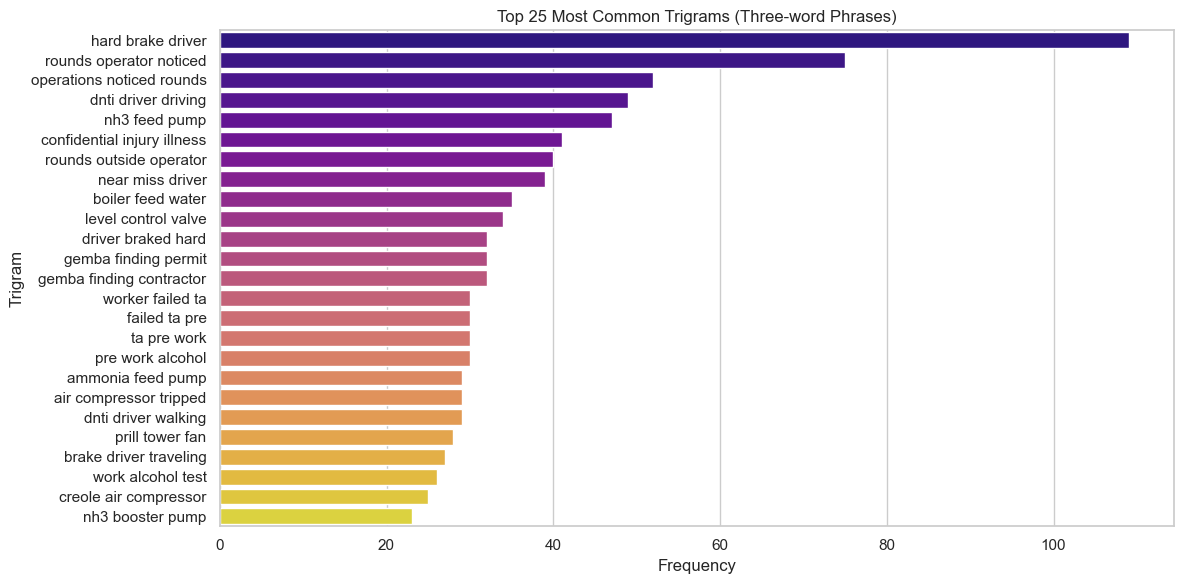


Top 25 Most Common Trigrams:
 1. hard brake driver                        -  109 occurrences
 2. rounds operator noticed                  -   75 occurrences
 3. operations noticed rounds                -   52 occurrences
 4. dnti driver driving                      -   49 occurrences
 5. nh3 feed pump                            -   47 occurrences
 6. confidential injury illness              -   41 occurrences
 7. rounds outside operator                  -   40 occurrences
 8. near miss driver                         -   39 occurrences
 9. boiler feed water                        -   35 occurrences
10. level control valve                      -   34 occurrences
11. driver braked hard                       -   32 occurrences
12. gemba finding permit                     -   32 occurrences
13. gemba finding contractor                 -   32 occurrences
14. worker failed ta                         -   30 occurrences
15. failed ta pre                            -   30 occurrences
16. ta pre

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_excel('Incidents.xlsx')

# Find the description column
desc_columns = [col for col in df.columns if 'desc' in col.lower() or 'brief' in col.lower()]
if 'Brief Description' in df.columns:
    brief_desc_col = 'Brief Description'
elif 'Brief_Description' in df.columns:
    brief_desc_col = 'Brief_Description'
else:
    brief_desc_col = desc_columns[0]

# Extract trigrams (3-word phrases)
vectorizer = CountVectorizer(ngram_range=(3,3), stop_words='english')
X = vectorizer.fit_transform(df[brief_desc_col].fillna(''))

# Calculate frequency
sum_words = X.sum(axis=0)
trigrams = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

# Sort and get top 25
trigrams = sorted(trigrams, key=lambda x: x[1], reverse=True)[:25]

# Create DataFrame
trigram_df = pd.DataFrame(trigrams, columns=["trigram", "count"])

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=trigram_df, x="count", y="trigram", palette="plasma")
plt.title("Top 25 Most Common Trigrams (Three-word Phrases)")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.tight_layout()
plt.show()

# Print the results
print("\nTop 25 Most Common Trigrams:")
print("="*60)
for i, (trigram, count) in enumerate(trigrams, 1):
    print(f"{i:2d}. {trigram:40s} - {int(count):4d} occurrences")
print("="*60)

In [43]:
#TOPIC MODELING (Step 4)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Create bag-of-words
vectorizer = CountVectorizer(max_df=0.95, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df["clean_desc"])

# Create LDA model (5 topics)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

words = vectorizer.get_feature_names_out()

# Display the top words in each topic
for i, topic in enumerate(lda.components_):
    print(f"\n⭐⭐ TOPIC #{i+1} ⭐⭐")
    print([words[j] for j in topic.argsort()[-15:]])



⭐⭐ TOPIC #1 ⭐⭐
['lost', 'valve', 'operations', 'noticed', 'compressor', 'urea', 'power', 'pressure', 'high', 'operator', 'level', 'failed', 'pump', 'tripped', 'plant']

⭐⭐ TOPIC #2 ⭐⭐
['building', 'floor', 'lock', 'hot', 'box', 'high', 'railcar', 'hazard', 'missing', 'lodan', 'working', 'permit', 'work', 'finding', 'gemba']

⭐⭐ TOPIC #3 ⭐⭐
['stop', 'driving', 'avoid', 'vehicle', 'miss', 'car', 'road', 'brake', 'trailer', 'loading', 'near', 'dnti', 'hard', 'truck', 'driver']

⭐⭐ TOPIC #4 ⭐⭐
['ice', 'fell', 'walking', 'emulsion', 'building', 'fuel', 'valve', 'ground', 'water', 'contractor', 'uan', 'noticed', 'area', 'tank', 'operator']

⭐⭐ TOPIC #5 ⭐⭐
['boiler', 'tower', 'cooling', 'operations', 'rounds', 'steam', 'operator', 'valve', 'acid', 'noticed', 'water', 'pump', 'leaking', 'line', 'leak']


In [45]:
#BERTopic

In [58]:
import numpy as np

def classify_issue(text):
    t = str(text).lower()

    # 1. Truck / driver related
    if any(w in t for w in ["truck", "driver", "trailer", "vehicle", "road", "brake", "loading bay"]):
        return "Truck / Driver"

    # 2. Pump / compressor trips and failures
    if any(w in t for w in ["pump tripped", "compressor tripped", "tripped", "psll", "trip", "shutdown"]):
        return "Pump / Compressor Trip"
    if any(w in t for w in ["pump", "compressor", "motor", "fan"]):
        return "Pump / Compressor Issue"

    # 3. Leaks / spills / releases
    if any(w in t for w in ["leak", "leaking", "spill", "spillage", "drip", "release", "odor", "smell"]):
        return "Leak / Spill"
    if any(w in t for w in ["ammonia", "nitric acid", "acid", "urea"]):
        return "Chemical / Process Leak"

    # 4. Valve & instrumentation
    if any(w in t for w in ["valve", "control valve", "cv", "instrument", "transmitter", "sensor"]):
        return "Valve / Instrument"

    # 5. Cooling systems
    if any(w in t for w in ["cooling tower", "cooling water", "cw", "tower"]):
        return "Cooling Water / Tower"

    # 6. Gemba, permits, JSA, paperwork
    if any(w in t for w in ["gemba", "jsa", "permit", "contractor", "register", "isolation", "lockout", "tagout"]):
        return "Gemba / Permit / JSA"

    # Fallback
    return "Other"

# Apply to your cleaned descriptions
df["Issue_Category"] = df["clean_desc"].apply(classify_issue)

df["Issue_Category"].value_counts()


Issue_Category
Other                      2387
Truck / Driver             1107
Leak / Spill                985
Pump / Compressor Issue     909
Pump / Compressor Trip      815
Gemba / Permit / JSA        531
Valve / Instrument          373
Chemical / Process Leak     346
Cooling Water / Tower       101
Name: count, dtype: int64

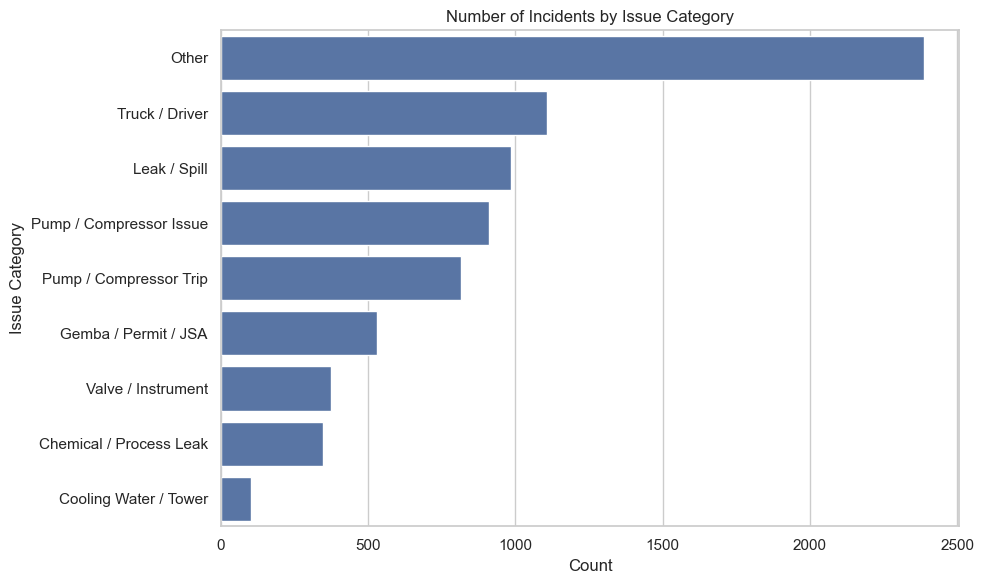

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    y="Issue_Category",
    order=df["Issue_Category"].value_counts().index
)
plt.title("Number of Incidents by Issue Category")
plt.xlabel("Count")
plt.ylabel("Issue Category")
plt.tight_layout()
plt.show()


In [60]:
# Create mapping dictionary
category_map = {
    "cooling tower": "Cooling System Issues",
    "cooling water": "Cooling System Issues",
    "water pump": "Pump Issues",
    "feed pump": "Pump Issues",
    "pump tripped": "Pump Issues",
    "compressor tripped": "Compressor Trips",
    "air compressor": "Compressor Trips",
    "control valve": "Valve/Instrument Issues",
    "block valve": "Valve/Instrument Issues",
    "acid plant": "Chemical/Plant Unit Issues",
    "urea plant": "Chemical/Plant Unit Issues",
    "nitric acid": "Chemical/Plant Unit Issues",
    "truck driver": "Driver Safety",
    "hard brake": "Driver Safety",
    "near miss": "Driver Safety",
    "gemba finding": "Gemba / Permit Findings",
    "permit work": "Gemba / Permit Findings",
    "finding contractor": "Gemba / Permit Findings",
    "operations noticed": "Operator Observations",
    "operator noticed": "Operator Observations"
}


In [61]:
def assign_category(text):
    for bigram, category in category_map.items():
        if bigram in text:
            return category
    return "Other"

df["Category"] = df["clean_desc"].apply(assign_category)
df["Category"].value_counts()


Category
Other                         5356
Driver Safety                  459
Gemba / Permit Findings        427
Operator Observations          399
Chemical/Plant Unit Issues     243
Cooling System Issues          237
Pump Issues                    193
Valve/Instrument Issues        146
Compressor Trips                94
Name: count, dtype: int64

C:\Users\sshaban\AppData\Local\Temp\ipykernel_27380\3368710277.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Category", order=df["Category"].value_counts().index, palette="viridis")


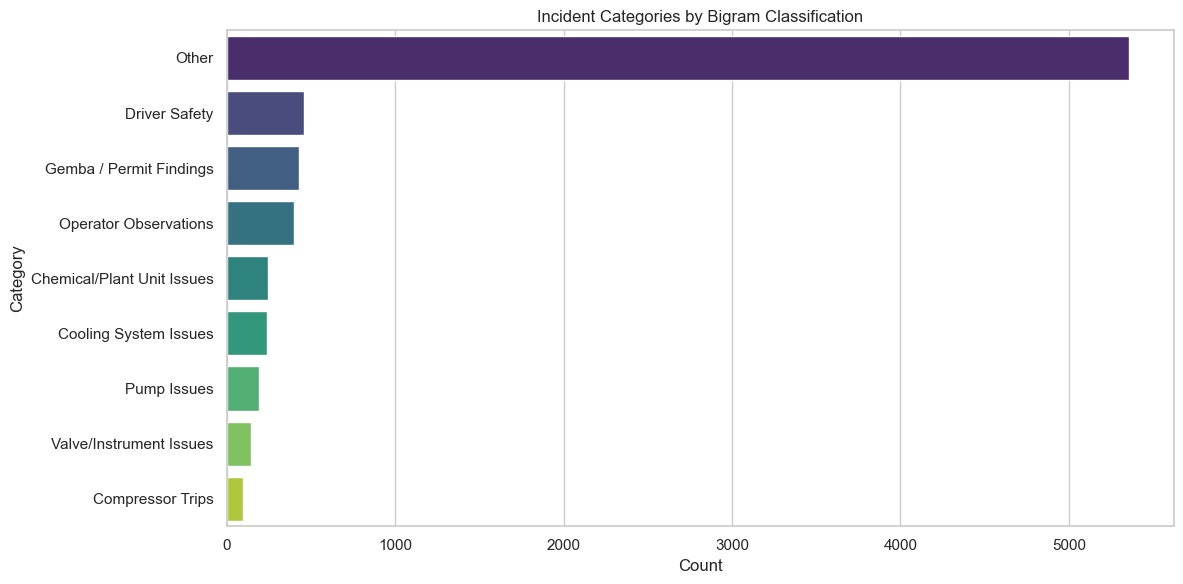

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=df, y="Category", order=df["Category"].value_counts().index, palette="viridis")
plt.title("Incident Categories by Bigram Classification")
plt.xlabel("Count")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [64]:
top_bigrams = bigram_df["bigram"].tolist()
top_bigrams


['gemba finding',
 'operations noticed',
 'dnti driver',
 'operator noticed',
 'acid plant',
 'cooling tower',
 'hard brake',
 'near miss',
 'rounds operator',
 'cooling water',
 'urea plant',
 'control valve',
 'outside operator',
 'feed pump',
 'water pump',
 'hard brakedriver',
 'compressor tripped',
 'pump tripped',
 'truck driver',
 'absorber tower',
 'normal operations',
 'nitric acid',
 'block valve',
 'air compressor',
 'control room']

In [66]:
import pandas as pd
import numpy as np

# Make sure dates are proper datetime
df["Reported Date"] = pd.to_datetime(df["Reported Date"], errors="coerce")
df["Date Closed (mandatory if Close this Record? = Yes)"] = pd.to_datetime(
    df["Date Closed (mandatory if Close this Record? = Yes)"], errors="coerce"
)

# If Date Closed is missing, use "today" as a proxy (still open)
today = pd.Timestamp.today().normalize()

df["Days_Open"] = (
    df["Date Closed (mandatory if Close this Record? = Yes)"].fillna(today)
    - df["Reported Date"]
).dt.days

df["Days_Open"].describe()


count    7554.000000
mean       44.346174
std       277.912699
min      -365.000000
25%         0.000000
50%         2.000000
75%        12.000000
max      4708.000000
Name: Days_Open, dtype: float64

In [67]:
# 1. Get list of top bigrams
top_bigrams = bigram_df["bigram"].tolist()

# 2. Function to compute average days open for incidents containing a bigram
def avg_days_for_bigram(bigram):
    mask = df["clean_desc"].str.contains(bigram, na=False)
    subset = df[mask]
    if subset.empty:
        return np.nan
    return subset["Days_Open"].mean()

# 3. Build results table
results = []
for bg in top_bigrams:
    avg_days = avg_days_for_bigram(bg)
    results.append([bg, avg_days])

duration_df = pd.DataFrame(results, columns=["bigram", "avg_days_open"])
duration_df = duration_df.sort_values("avg_days_open", ascending=False)
duration_df


,bigram,avg_days_open
7,near miss,146.725000
10,urea plant,102.885417
21,nitric acid,86.423729
2,dnti driver,79.771689
4,acid plant,53.509677
18,truck driver,38.584615
12,outside operator,37.638298
23,air compressor,30.644068
6,hard brake,28.961722
13,feed pump,26.777778


C:\Users\sshaban\AppData\Local\Temp\ipykernel_27380\1173953159.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=duration_df, x="avg_days_open", y="bigram", palette="magma")


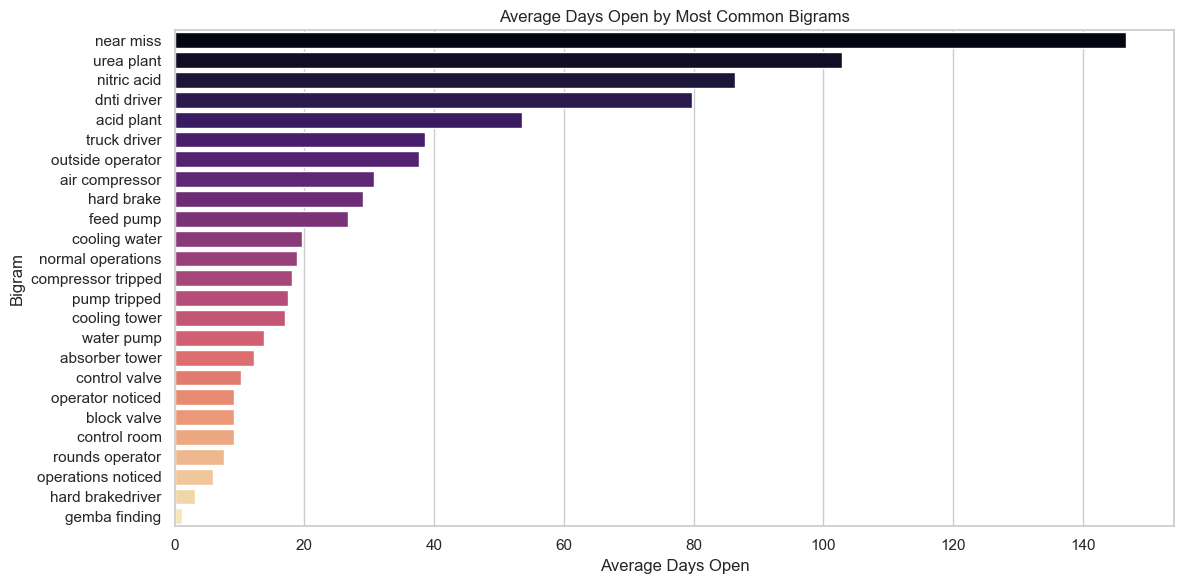

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=duration_df, x="avg_days_open", y="bigram", palette="magma")
plt.title("Average Days Open by Most Common Bigrams")
plt.xlabel("Average Days Open")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()



DIAGNOSTIC CHECKS - Finding the Date Issue

1. COLUMN NAMES IN YOUR FILE:
['Incident No.', 'Status', 'Reported Date', 'Incident Date', 'Department', 'Site', 'Brief Description', 'Activity Type', 'Type', 'Special Investigation Type', 'Highest Initial Risk Ranking', 'Supervisor / Line Mgr', 'Manager', 'Investigation Mgr', 'Investigation Due Date', 'Actions', 'Date Closed (mandatory if Close this Record? = Yes)']

2. DATE COLUMNS FOUND: ['Reported Date', 'Incident Date', 'Investigation Due Date', 'Date Closed (mandatory if Close this Record? = Yes)']

3. DESCRIPTION COLUMNS FOUND: ['Brief Description']

4. FIRST 5 ROWS OF DATA:
  Incident No. Status Reported Date Incident Date  \
0  INC-1475522   Open    2025-12-08    2025-12-08   
1  INC-1475521   Open    2025-12-08    2025-12-08   
2  INC-1475520   Open    2025-12-08    2025-12-08   
3  INC-1475501   Open    2025-12-08    2025-12-07   
4  INC-1475420   Open    2025-12-07    2025-12-07   

                        Department         Site

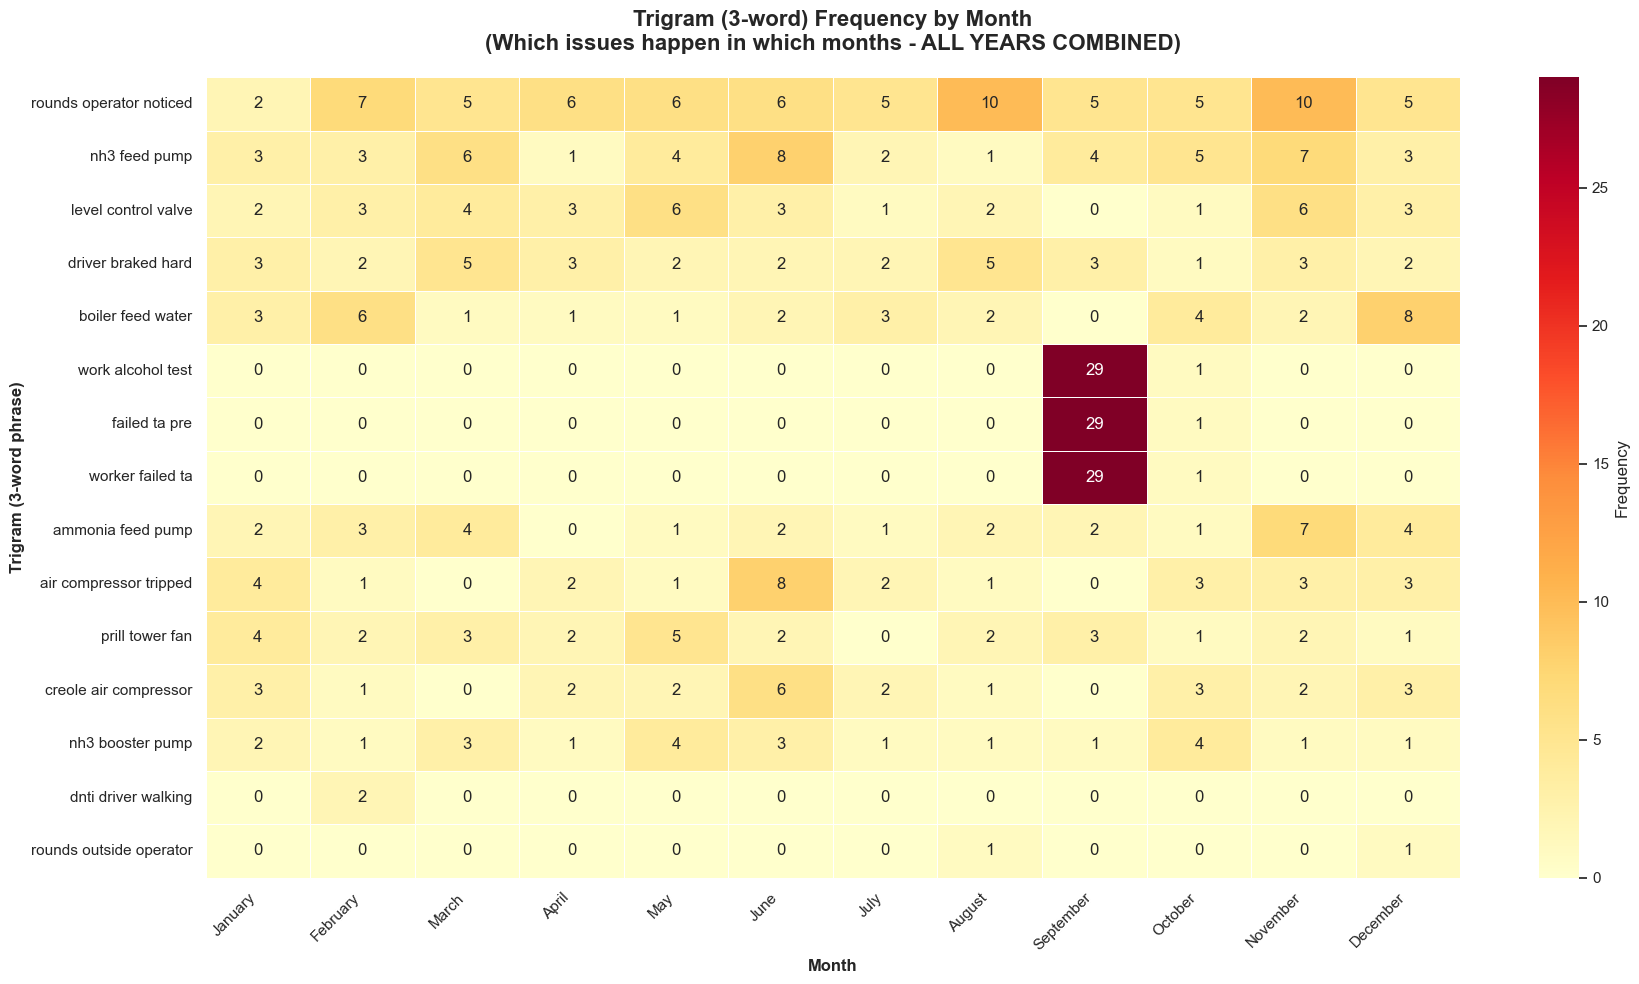


TRIGRAM (3-WORD) FREQUENCY BY MONTH - SUMMARY

MATRIX VIEW:
                         January  February  March  April  May  June  July  August  September  October  November  December  Total
rounds operator noticed        2         7      5      6    6     6     5      10          5        5        10         5     72
nh3 feed pump                  3         3      6      1    4     8     2       1          4        5         7         3     47
level control valve            2         3      4      3    6     3     1       2          0        1         6         3     34
driver braked hard             3         2      5      3    2     2     2       5          3        1         3         2     33
boiler feed water              3         6      1      1    1     2     3       2          0        4         2         8     33
work alcohol test              0         0      0      0    0     0     0       0         29        1         0         0     30
failed ta pre                  0    

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Read the Excel file
df = pd.read_excel('Incidents.xlsx')

print("\n" + "="*100)
print("DIAGNOSTIC CHECKS - Finding the Date Issue")
print("="*100)

# Check column names
print("\n1. COLUMN NAMES IN YOUR FILE:")
print(df.columns.tolist())

# Try to find the date column
date_columns = [col for col in df.columns if 'date' in col.lower() or 'Date' in col]
print(f"\n2. DATE COLUMNS FOUND: {date_columns}")

# Try to find the description column
desc_columns = [col for col in df.columns if 'desc' in col.lower() or 'brief' in col.lower()]
print(f"\n3. DESCRIPTION COLUMNS FOUND: {desc_columns}")

# Show first few rows
print("\n4. FIRST 5 ROWS OF DATA:")
print(df.head())

# Let's use the correct column names (adjust based on what we find)
# Common possibilities: 'Incident Date', 'Incident_Date', 'Date', 'Reported Date'
incident_date_col = None
if 'Incident Date' in df.columns:
    incident_date_col = 'Incident Date'
elif 'Incident_Date' in df.columns:
    incident_date_col = 'Incident_Date'
elif date_columns:
    incident_date_col = date_columns[0]
    
brief_desc_col = None
if 'Brief Description' in df.columns:
    brief_desc_col = 'Brief Description'
elif 'Brief_Description' in df.columns:
    brief_desc_col = 'Brief_Description'
elif desc_columns:
    brief_desc_col = desc_columns[0]

print(f"\n5. USING COLUMNS:")
print(f"   Date column: {incident_date_col}")
print(f"   Description column: {brief_desc_col}")

if incident_date_col is None or brief_desc_col is None:
    print("\n❌ ERROR: Could not identify date or description columns!")
    print("Please check your column names and update the code accordingly.")
else:
    # Convert to datetime
    df[incident_date_col] = pd.to_datetime(df[incident_date_col], errors='coerce')
    
    # Check for null dates
    null_count = df[incident_date_col].isnull().sum()
    print(f"\n6. NULL DATES AFTER CONVERSION: {null_count} out of {len(df)}")
    
    # Show date range
    print(f"\n7. DATE RANGE:")
    print(f"   Earliest: {df[incident_date_col].min()}")
    print(f"   Latest: {df[incident_date_col].max()}")
    
    # Extract temporal features
    df['Month'] = df[incident_date_col].dt.strftime('%B')
    df['Year'] = df[incident_date_col].dt.year
    
    # Check distribution
    print(f"\n8. INCIDENTS BY MONTH (ALL YEARS COMBINED):")
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    month_counts = df['Month'].value_counts()
    for month in month_order:
        count = month_counts.get(month, 0)
        print(f"   {month}: {count}")
    
    print(f"\n9. INCIDENTS BY YEAR:")
    year_counts = df['Year'].value_counts().sort_index()
    print(year_counts)
    
    print("\n" + "="*100)
    print("NOW CREATING BIGRAM ANALYSIS...")
    print("="*100)
    
    # Extract TRIGRAMS (3-word phrases)
    vectorizer = CountVectorizer(ngram_range=(3,3), stop_words='english', max_features=25)
    X = vectorizer.fit_transform(df[brief_desc_col].fillna(''))
    all_trigrams = vectorizer.get_feature_names_out()
    
    print(f"\nTop 25 trigrams (3-word phrases) found: {list(all_trigrams)}")
    
    # Create matrix
    months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                    'July', 'August', 'September', 'October', 'November', 'December']
    
    trigram_month_matrix = []
    
    for trigram in all_trigrams:
        row = []
        for month in months_order:
            month_data = df[df['Month'] == month]
            count = sum(month_data[brief_desc_col].fillna('').str.contains(trigram, case=False, regex=False))
            row.append(count)
        trigram_month_matrix.append(row)
    
    # Convert to DataFrame
    result_df = pd.DataFrame(trigram_month_matrix, columns=months_order, index=all_trigrams)
    result_df = result_df[result_df.sum(axis=1) > 0]
    result_df['Total'] = result_df.sum(axis=1)
    result_df = result_df.sort_values('Total', ascending=False)
    
    # Remove Total column for display
    result_df_display = result_df.drop('Total', axis=1)
    
    # Visualization
    plt.figure(figsize=(18, 10))
    sns.heatmap(result_df_display, annot=True, fmt='g', cmap='YlOrRd', 
                linewidths=0.5, cbar_kws={'label': 'Frequency'})
    plt.title('Trigram (3-word) Frequency by Month\n(Which issues happen in which months - ALL YEARS COMBINED)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Month', fontsize=12, fontweight='bold')
    plt.ylabel('Trigram (3-word phrase)', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Summary table
    print("\n" + "="*100)
    print("TRIGRAM (3-WORD) FREQUENCY BY MONTH - SUMMARY")
    print("="*100)
    print("\nMATRIX VIEW:")
    print(result_df.to_string())
    
    print("\n\nTOP PATTERNS:")
    print("-"*100)
    for idx, (trigram, total) in enumerate(result_df['Total'].items(), 1):
        if idx <= 10:
            peak_month = result_df.loc[trigram, months_order].idxmax()
            peak_count = result_df.loc[trigram, peak_month]
            
            # Show all months with incidents for this trigram
            months_with_incidents = []
            for month in months_order:
                count = result_df.loc[trigram, month]
                if count > 0:
                    months_with_incidents.append(f"{month}({int(count)})")
            
            print(f"{idx}. '{trigram}'")
            print(f"   Total: {int(total)} | Peak: {peak_month} ({int(peak_count)})")
            print(f"   All months: {', '.join(months_with_incidents)}")
            print()
    
    print("="*100)


DIAGNOSTIC CHECKS - Finding the Date Issue

1. COLUMN NAMES IN YOUR FILE:
['Incident No.', 'Status', 'Reported Date', 'Incident Date', 'Department', 'Site', 'Brief Description', 'Activity Type', 'Type', 'Special Investigation Type', 'Highest Initial Risk Ranking', 'Supervisor / Line Mgr', 'Manager', 'Investigation Mgr', 'Investigation Due Date', 'Actions', 'Date Closed (mandatory if Close this Record? = Yes)']

2. DATE COLUMNS FOUND: ['Reported Date', 'Incident Date', 'Investigation Due Date', 'Date Closed (mandatory if Close this Record? = Yes)']

3. DESCRIPTION COLUMNS FOUND: ['Brief Description']

4. FIRST 5 ROWS OF DATA:
  Incident No. Status Reported Date Incident Date  \
0  INC-1475522   Open    2025-12-08    2025-12-08   
1  INC-1475521   Open    2025-12-08    2025-12-08   
2  INC-1475520   Open    2025-12-08    2025-12-08   
3  INC-1475501   Open    2025-12-08    2025-12-07   
4  INC-1475420   Open    2025-12-07    2025-12-07   

                        Department         Site

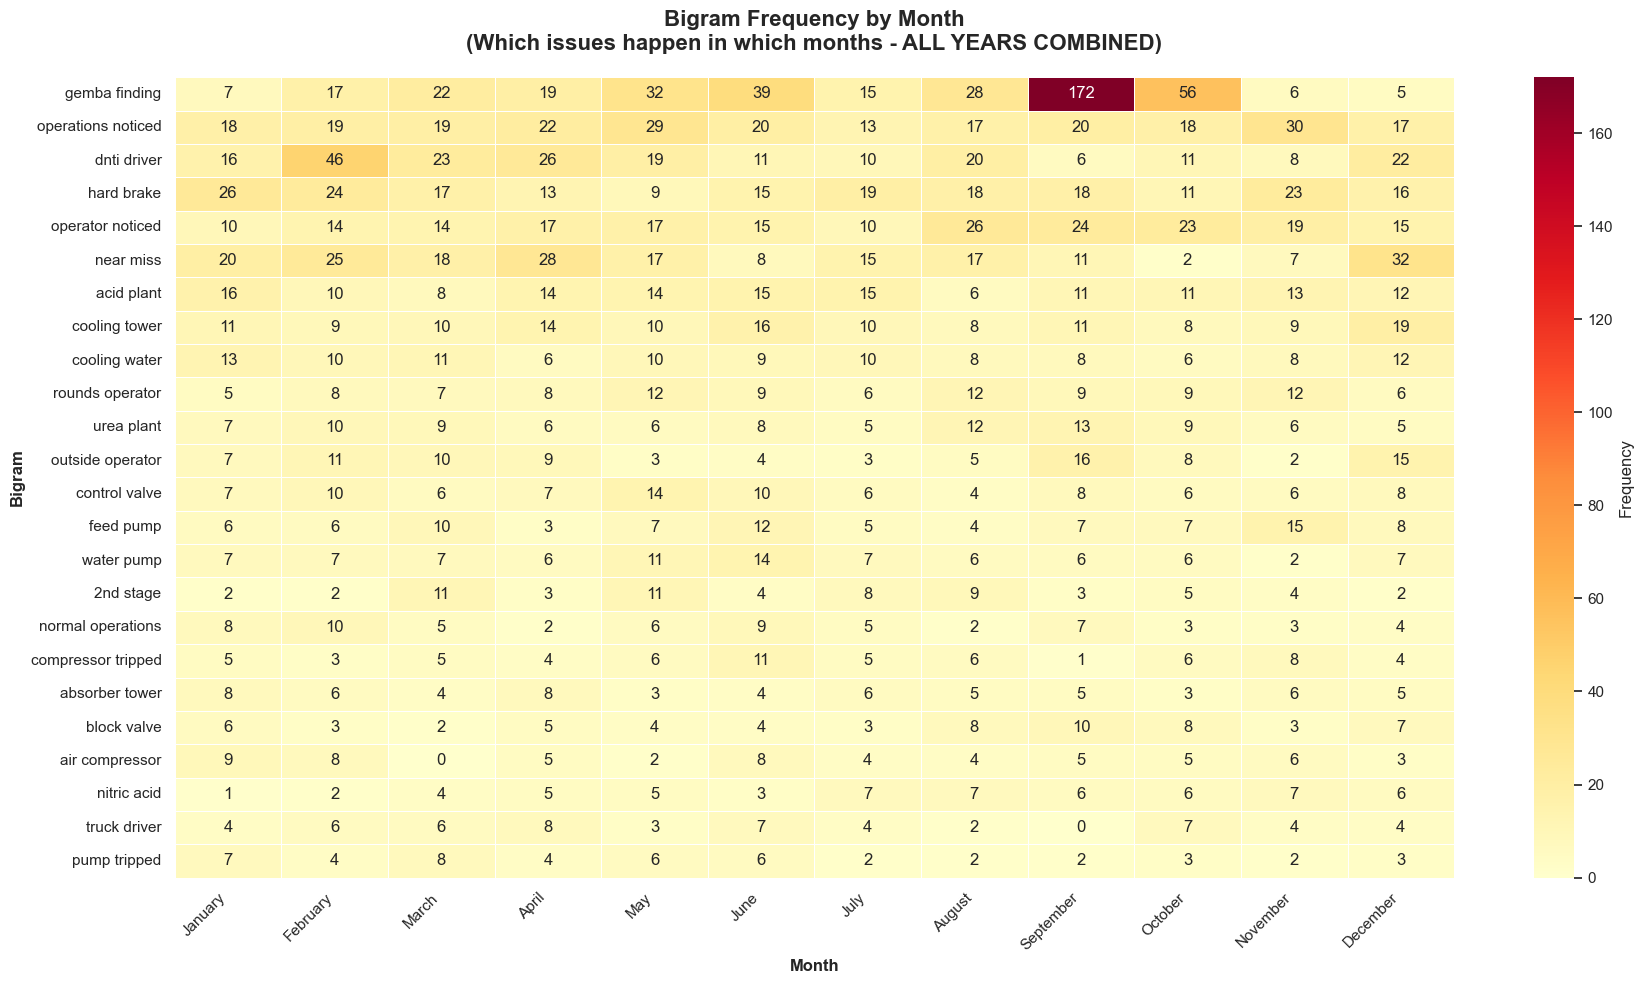


BIGRAM FREQUENCY BY MONTH - SUMMARY

MATRIX VIEW:
                    January  February  March  April  May  June  July  August  September  October  November  December  Total
gemba finding             7        17     22     19   32    39    15      28        172       56         6         5    418
operations noticed       18        19     19     22   29    20    13      17         20       18        30        17    242
dnti driver              16        46     23     26   19    11    10      20          6       11         8        22    218
hard brake               26        24     17     13    9    15    19      18         18       11        23        16    209
operator noticed         10        14     14     17   17    15    10      26         24       23        19        15    204
near miss                20        25     18     28   17     8    15      17         11        2         7        32    200
acid plant               16        10      8     14   14    15    15       6     

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Read the Excel file
df = pd.read_excel('Incidents.xlsx')

print("\n" + "="*100)
print("DIAGNOSTIC CHECKS - Finding the Date Issue")
print("="*100)

# Check column names
print("\n1. COLUMN NAMES IN YOUR FILE:")
print(df.columns.tolist())

# Try to find the date column
date_columns = [col for col in df.columns if 'date' in col.lower() or 'Date' in col]
print(f"\n2. DATE COLUMNS FOUND: {date_columns}")

# Try to find the description column
desc_columns = [col for col in df.columns if 'desc' in col.lower() or 'brief' in col.lower()]
print(f"\n3. DESCRIPTION COLUMNS FOUND: {desc_columns}")

# Show first few rows
print("\n4. FIRST 5 ROWS OF DATA:")
print(df.head())

# Let's use the correct column names (adjust based on what we find)
# Common possibilities: 'Incident Date', 'Incident_Date', 'Date', 'Reported Date'
incident_date_col = None
if 'Incident Date' in df.columns:
    incident_date_col = 'Incident Date'
elif 'Incident_Date' in df.columns:
    incident_date_col = 'Incident_Date'
elif date_columns:
    incident_date_col = date_columns[0]
    
brief_desc_col = None
if 'Brief Description' in df.columns:
    brief_desc_col = 'Brief Description'
elif 'Brief_Description' in df.columns:
    brief_desc_col = 'Brief_Description'
elif desc_columns:
    brief_desc_col = desc_columns[0]

print(f"\n5. USING COLUMNS:")
print(f"   Date column: {incident_date_col}")
print(f"   Description column: {brief_desc_col}")

if incident_date_col is None or brief_desc_col is None:
    print("\n❌ ERROR: Could not identify date or description columns!")
    print("Please check your column names and update the code accordingly.")
else:
    # Convert to datetime
    df[incident_date_col] = pd.to_datetime(df[incident_date_col], errors='coerce')
    
    # Check for null dates
    null_count = df[incident_date_col].isnull().sum()
    print(f"\n6. NULL DATES AFTER CONVERSION: {null_count} out of {len(df)}")
    
    # Show date range
    print(f"\n7. DATE RANGE:")
    print(f"   Earliest: {df[incident_date_col].min()}")
    print(f"   Latest: {df[incident_date_col].max()}")
    
    # Extract temporal features
    df['Month'] = df[incident_date_col].dt.strftime('%B')
    df['Year'] = df[incident_date_col].dt.year
    
    # Check distribution
    print(f"\n8. INCIDENTS BY MONTH (ALL YEARS COMBINED):")
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    month_counts = df['Month'].value_counts()
    for month in month_order:
        count = month_counts.get(month, 0)
        print(f"   {month}: {count}")
    
    print(f"\n9. INCIDENTS BY YEAR:")
    year_counts = df['Year'].value_counts().sort_index()
    print(year_counts)
    
    print("\n" + "="*100)
    print("NOW CREATING BIGRAM ANALYSIS...")
    print("="*100)
    
    # Extract bigrams
    vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=25)
    X = vectorizer.fit_transform(df[brief_desc_col].fillna(''))
    all_bigrams = vectorizer.get_feature_names_out()
    
    print(f"\nTop 25 bigrams found: {list(all_bigrams)}")
    
    # Create matrix
    months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                    'July', 'August', 'September', 'October', 'November', 'December']
    
    bigram_month_matrix = []
    
    for bigram in all_bigrams:
        row = []
        for month in months_order:
            month_data = df[df['Month'] == month]
            count = sum(month_data[brief_desc_col].fillna('').str.contains(bigram, case=False, regex=False))
            row.append(count)
        bigram_month_matrix.append(row)
    
    # Convert to DataFrame
    result_df = pd.DataFrame(bigram_month_matrix, columns=months_order, index=all_bigrams)
    result_df = result_df[result_df.sum(axis=1) > 0]
    result_df['Total'] = result_df.sum(axis=1)
    result_df = result_df.sort_values('Total', ascending=False)
    
    # Remove Total column for display
    result_df_display = result_df.drop('Total', axis=1)
    
    # Visualization
    plt.figure(figsize=(18, 10))
    sns.heatmap(result_df_display, annot=True, fmt='g', cmap='YlOrRd', 
                linewidths=0.5, cbar_kws={'label': 'Frequency'})
    plt.title('Bigram Frequency by Month\n(Which issues happen in which months - ALL YEARS COMBINED)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Month', fontsize=12, fontweight='bold')
    plt.ylabel('Bigram', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # Summary table
    print("\n" + "="*100)
    print("BIGRAM FREQUENCY BY MONTH - SUMMARY")
    print("="*100)
    print("\nMATRIX VIEW:")
    print(result_df.to_string())
    
    print("\n\nTOP PATTERNS:")
    print("-"*100)
    for idx, (bigram, total) in enumerate(result_df['Total'].items(), 1):
        if idx <= 10:
            peak_month = result_df.loc[bigram, months_order].idxmax()
            peak_count = result_df.loc[bigram, peak_month]
            
            # Show all months with incidents for this bigram
            months_with_incidents = []
            for month in months_order:
                count = result_df.loc[bigram, month]
                if count > 0:
                    months_with_incidents.append(f"{month}({int(count)})")
            
            print(f"{idx}. '{bigram}'")
            print(f"   Total: {int(total)} | Peak: {peak_month} ({int(peak_count)})")
            print(f"   All months: {', '.join(months_with_incidents)}")
            print()
    
    print("="*100)

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import ipywidgets as widgets
from IPython.display import display, clear_output

# Read the Excel file
df = pd.read_excel('Incidents.xlsx')

# Find columns
date_columns = [col for col in df.columns if 'date' in col.lower() or 'Date' in col]
desc_columns = [col for col in df.columns if 'desc' in col.lower() or 'brief' in col.lower()]

incident_date_col = 'Incident Date' if 'Incident Date' in df.columns else date_columns[0] if date_columns else None
brief_desc_col = 'Brief Description' if 'Brief Description' in df.columns else desc_columns[0] if desc_columns else None

# Convert to datetime
df[incident_date_col] = pd.to_datetime(df[incident_date_col], errors='coerce')
df['Month'] = df[incident_date_col].dt.strftime('%B')
df['Year'] = df[incident_date_col].dt.year

# Get unique years
years = sorted([y for y in df['Year'].dropna().unique() if not pd.isna(y)])
year_options = ['All Years'] + [str(int(y)) for y in years]

print("="*100)
print("BIGRAM SEASONAL ANALYSIS WITH YEAR FILTER")
print("="*100)

# Create dropdown widget
year_dropdown = widgets.Dropdown(
    options=year_options,
    value='All Years',
    description='Select Year:',
    style={'description_width': 'initial'}
)

output = widgets.Output()

def analyze_bigrams(selected_year):
    with output:
        clear_output(wait=True)
        
        # Filter data by year
        if selected_year == 'All Years':
            filtered_df = df.copy()
            title_suffix = "ALL YEARS COMBINED"
        else:
            filtered_df = df[df['Year'] == int(selected_year)].copy()
            title_suffix = f"YEAR {selected_year}"
        
        print(f"\n{'='*100}")
        print(f"ANALYZING: {title_suffix}")
        print(f"Total incidents in selection: {len(filtered_df)}")
        print(f"{'='*100}\n")
        
        # Extract bigrams
        vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=25)
        X = vectorizer.fit_transform(filtered_df[brief_desc_col].fillna(''))
        all_bigrams = vectorizer.get_feature_names_out()
        
        if len(all_bigrams) == 0:
            print("⚠️ No bigrams found for this selection. Try a different year or 'All Years'.")
            return
        
        print(f"Top {len(all_bigrams)} bigrams found: {list(all_bigrams)}\n")
        
        # Create matrix
        months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                       'July', 'August', 'September', 'October', 'November', 'December']
        
        bigram_month_matrix = []
        
        for bigram in all_bigrams:
            row = []
            for month in months_order:
                month_data = filtered_df[filtered_df['Month'] == month]
                count = sum(month_data[brief_desc_col].fillna('').str.contains(bigram, case=False, regex=False))
                row.append(count)
            bigram_month_matrix.append(row)
        
        # Convert to DataFrame
        result_df = pd.DataFrame(bigram_month_matrix, columns=months_order, index=all_bigrams)
        result_df = result_df[result_df.sum(axis=1) > 0]
        
        if len(result_df) == 0:
            print("⚠️ No data found for the selected year.")
            return
            
        result_df['Total'] = result_df.sum(axis=1)
        result_df = result_df.sort_values('Total', ascending=False)
        
        # Remove Total column for display
        result_df_display = result_df.drop('Total', axis=1)
        
        # Visualization
        plt.figure(figsize=(18, 10))
        sns.heatmap(result_df_display, annot=True, fmt='g', cmap='YlOrRd', 
                    linewidths=0.5, cbar_kws={'label': 'Frequency'})
        plt.title(f'Bigram Frequency by Month\n({title_suffix})', 
                  fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Month', fontsize=12, fontweight='bold')
        plt.ylabel('Bigram', fontsize=12, fontweight='bold')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        
        # Summary table
        print("\n" + "="*100)
        print(f"BIGRAM FREQUENCY BY MONTH - {title_suffix}")
        print("="*100)
        
        print("\n\nTOP 10 PATTERNS:")
        print("-"*100)
        for idx, (bigram, total) in enumerate(result_df['Total'].items(), 1):
            if idx <= 10:
                peak_month = result_df.loc[bigram, months_order].idxmax()
                peak_count = result_df.loc[bigram, peak_month]
                
                # Show all months with incidents for this bigram
                months_with_incidents = []
                for month in months_order:
                    count = result_df.loc[bigram, month]
                    if count > 0:
                        months_with_incidents.append(f"{month}({int(count)})")
                
                print(f"{idx}. '{bigram}'")
                print(f"   Total: {int(total)} | Peak: {peak_month} ({int(peak_count)})")
                print(f"   Months: {', '.join(months_with_incidents)}")
                print()
        
        print("="*100)

# Set up interactive widget
def on_year_change(change):
    analyze_bigrams(change['new'])

year_dropdown.observe(on_year_change, names='value')

# Display widget and initial analysis
print("\n📅 Use the dropdown below to filter by year:\n")
display(year_dropdown)
display(output)

# Run initial analysis
analyze_bigrams('All Years')


BIGRAM SEASONAL ANALYSIS WITH YEAR FILTER

📅 Use the dropdown below to filter by year:



Dropdown(description='Select Year:', options=('All Years', '2010', '2011', '2012', '2013', '2014', '2015', '20…

Output()

INCIDENT TYPE PREDICTION MODEL
Predicting which bigram incident will occur based on temporal and text features

📁 STEP 1: Loading and preparing data...
✓ Loaded 7550 incidents
✓ Date range: 2010-12-21 00:00:00 to 2025-12-08 00:00:00

🎯 STEP 2: Extracting incident types (bigrams) as target variable...
✓ Top 15 bigram types: ['acid plant', 'brake driver', 'control valve', 'cooling tower', 'cooling water', 'dnti driver', 'feed pump', 'gemba finding', 'hard brake', 'near miss', 'operations noticed', 'operator noticed', 'outside operator', 'rounds operator', 'urea plant']
✓ Classified 2140 incidents into 14 categories

Incident type distribution:
incident_type
gemba finding         417
operations noticed    220
dnti driver           218
hard brake            204
operator noticed      185
near miss             179
acid plant            145
cooling tower         122
cooling water          95
feed pump              89
control valve          89
urea plant             78
outside operator       6

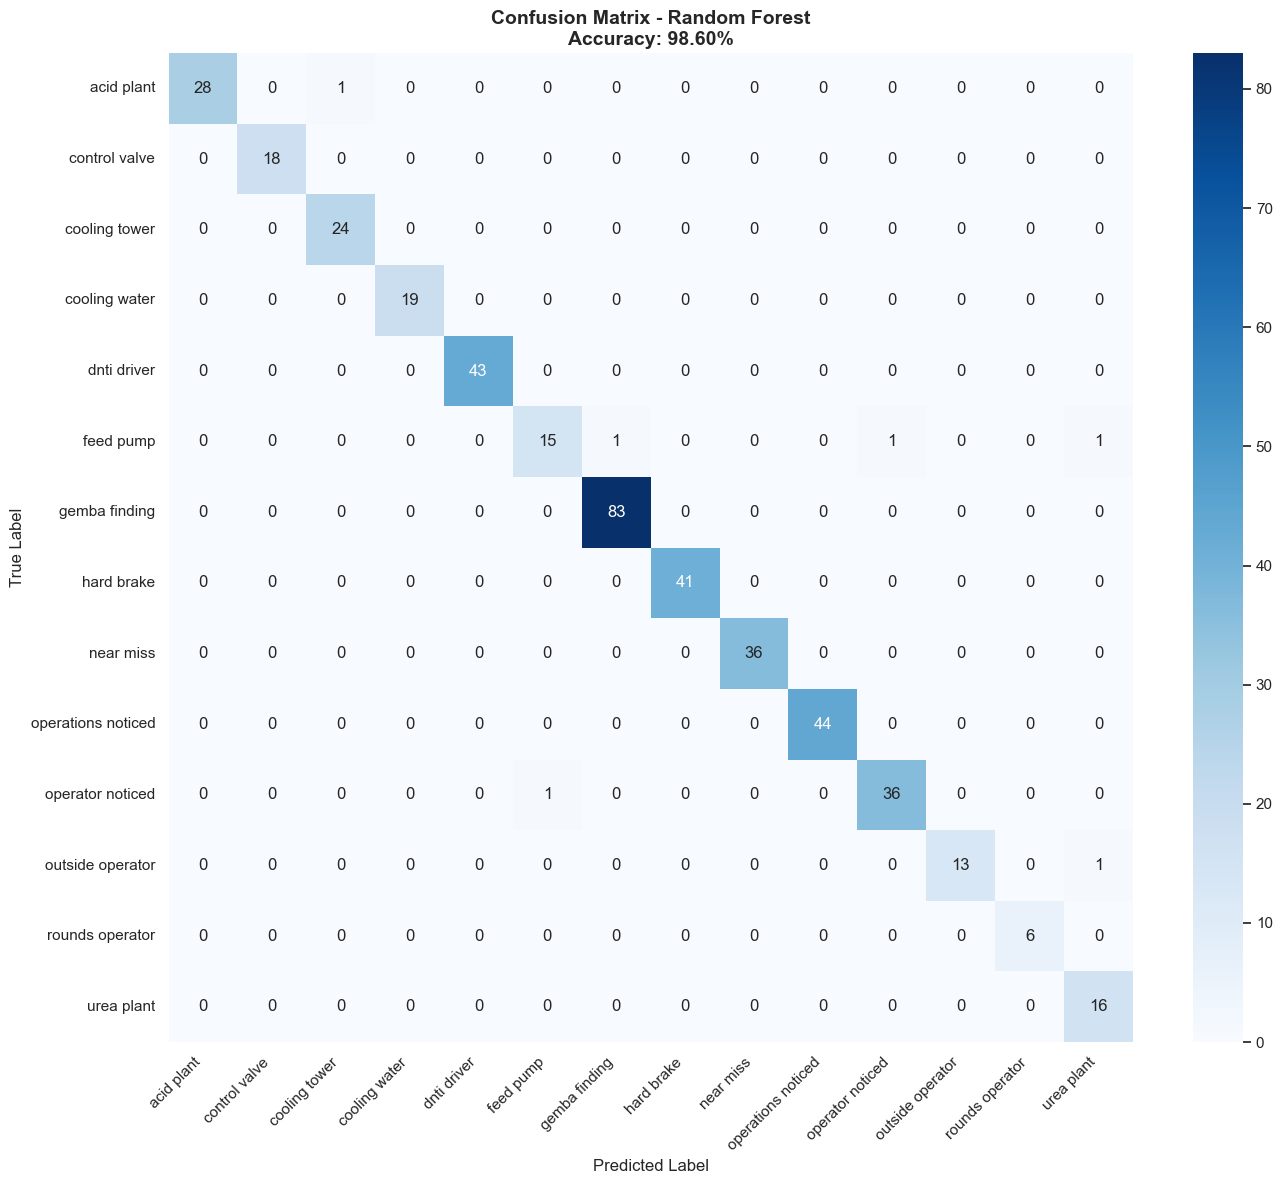


🔍 Top 10 Most Important Features:


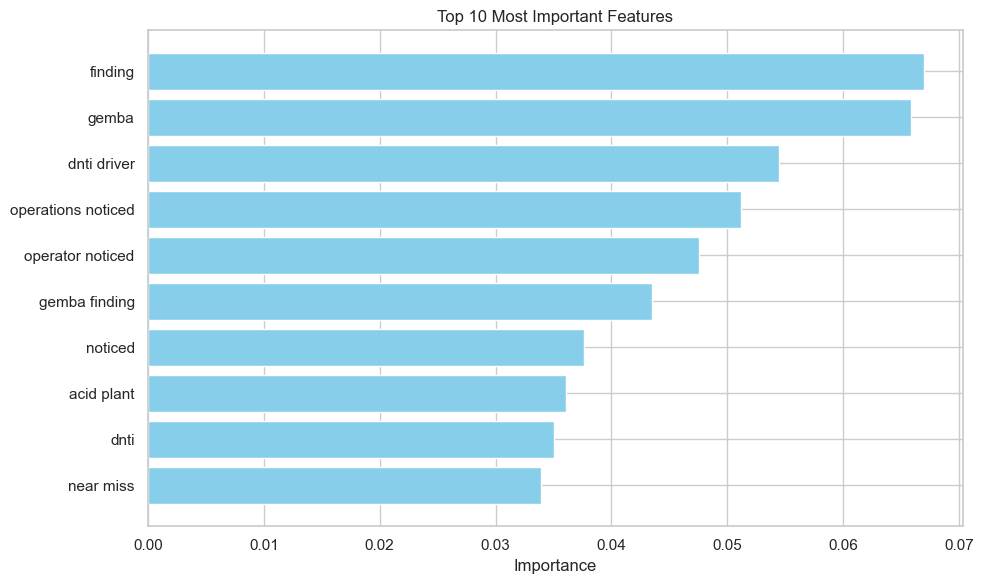

  finding: 0.0670
  gemba: 0.0658
  dnti driver: 0.0545
  operations noticed: 0.0512
  operator noticed: 0.0475
  gemba finding: 0.0435
  noticed: 0.0376
  acid plant: 0.0361
  dnti: 0.0351
  near miss: 0.0339

🔮 STEP 8: Making predictions for future months...

📅 Most likely incident types by month:
January     : gemba finding             (confidence: 75.67%)
February    : gemba finding             (confidence: 76.00%)
March       : gemba finding             (confidence: 76.00%)
April       : gemba finding             (confidence: 76.33%)
May         : gemba finding             (confidence: 76.00%)
June        : gemba finding             (confidence: 75.67%)
July        : gemba finding             (confidence: 78.00%)
August      : gemba finding             (confidence: 78.33%)
September   : gemba finding             (confidence: 78.33%)
October     : gemba finding             (confidence: 78.67%)
November    : gemba finding             (confidence: 78.67%)
December    : gemba finding 

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("="*100)
print("INCIDENT TYPE PREDICTION MODEL")
print("Predicting which bigram incident will occur based on temporal and text features")
print("="*100)

# ======================== STEP 1: LOAD AND PREPARE DATA ========================
print("\n📁 STEP 1: Loading and preparing data...")
df = pd.read_excel('Incidents.xlsx')

# Find columns
date_columns = [col for col in df.columns if 'date' in col.lower()]
desc_columns = [col for col in df.columns if 'desc' in col.lower() or 'brief' in col.lower()]

incident_date_col = 'Incident Date' if 'Incident Date' in df.columns else date_columns[0]
brief_desc_col = 'Brief Description' if 'Brief Description' in df.columns else desc_columns[0]

# Convert dates
df[incident_date_col] = pd.to_datetime(df[incident_date_col], errors='coerce')
df = df.dropna(subset=[incident_date_col, brief_desc_col])

# Extract temporal features
df['Year'] = df[incident_date_col].dt.year
df['Month'] = df[incident_date_col].dt.month
df['Quarter'] = df[incident_date_col].dt.quarter
df['DayOfWeek'] = df[incident_date_col].dt.dayofweek
df['DayOfYear'] = df[incident_date_col].dt.dayofyear
df['WeekOfYear'] = df[incident_date_col].dt.isocalendar().week

print(f"✓ Loaded {len(df)} incidents")
print(f"✓ Date range: {df[incident_date_col].min()} to {df[incident_date_col].max()}")

# ======================== STEP 2: EXTRACT TARGET (BIGRAMS) ========================
print("\n🎯 STEP 2: Extracting incident types (bigrams) as target variable...")

# Extract top bigrams to use as categories
vectorizer_bigrams = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=15)
X_bigrams = vectorizer_bigrams.fit_transform(df[brief_desc_col].fillna(''))
bigram_features = vectorizer_bigrams.get_feature_names_out()

print(f"✓ Top 15 bigram types: {list(bigram_features)}")

# Assign each incident to its primary bigram category
def get_primary_bigram(text):
    if pd.isna(text):
        return 'other'
    text = str(text).lower()
    for bigram in bigram_features:
        if bigram in text:
            return bigram
    return 'other'

df['incident_type'] = df[brief_desc_col].apply(get_primary_bigram)

# Filter to keep only incidents with known bigram types
df = df[df['incident_type'] != 'other']

print(f"✓ Classified {len(df)} incidents into {df['incident_type'].nunique()} categories")
print(f"\nIncident type distribution:")
print(df['incident_type'].value_counts())

# ======================== STEP 3: CREATE FEATURES ========================
print("\n🔧 STEP 3: Creating feature set...")

# Temporal features
temporal_features = ['Month', 'Quarter', 'DayOfWeek', 'WeekOfYear']
X_temporal = df[temporal_features].values

# Text features using TF-IDF
tfidf = TfidfVectorizer(max_features=50, stop_words='english', ngram_range=(1,2))
X_text = tfidf.fit_transform(df[brief_desc_col].fillna('')).toarray()

# Combine features
X = np.hstack([X_temporal, X_text])
y = df['incident_type'].values

print(f"✓ Feature matrix shape: {X.shape}")
print(f"✓ Features: {len(temporal_features)} temporal + {X_text.shape[1]} text features")

# ======================== STEP 4: SPLIT DATA ========================
print("\n✂️ STEP 4: Splitting data (80% train, 20% test)...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"✓ Training set: {len(X_train)} samples")
print(f"✓ Test set: {len(X_test)} samples")

# ======================== STEP 5: TRAIN BASELINE MODELS ========================
print("\n🤖 STEP 5: Training baseline models...")

models = {
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
}

results = {}

for name, model in models.items():
    print(f"\n  Training {name}...")
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Metrics
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    
    results[name] = {
        'model': model,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'f1_score': f1
    }
    
    print(f"    Train Accuracy: {train_acc:.4f}")
    print(f"    Test Accuracy:  {test_acc:.4f}")
    print(f"    F1 Score:       {f1:.4f}")

# Find best model
best_model_name = max(results, key=lambda x: results[x]['test_acc'])
best_model = results[best_model_name]['model']

print(f"\n✨ Best Model: {best_model_name}")
print(f"   Test Accuracy: {results[best_model_name]['test_acc']:.4f}")

# ======================== STEP 6: HYPERPARAMETER TUNING ========================
print("\n⚙️ STEP 6: Hyperparameter tuning for best model...")

if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    base_model = RandomForestClassifier(random_state=42, n_jobs=-1)
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'min_samples_split': [2, 5, 10]
    }
    base_model = GradientBoostingClassifier(random_state=42)
else:  # Logistic Regression
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'saga']
    }
    base_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')

print(f"  Running GridSearchCV with {len(param_grid)} parameters...")
grid_search = GridSearchCV(
    base_model, param_grid, cv=5, scoring='accuracy', 
    n_jobs=-1, verbose=0
)

grid_search.fit(X_train, y_train)

print(f"\n✓ Best parameters: {grid_search.best_params_}")
print(f"✓ Best cross-validation score: {grid_search.best_score_:.4f}")

# Final model
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)

final_accuracy = accuracy_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final, average='weighted')

print(f"\n🎯 FINAL MODEL PERFORMANCE:")
print(f"   Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"   F1 Score: {final_f1:.4f}")

# ======================== STEP 7: DETAILED EVALUATION ========================
print("\n📊 STEP 7: Detailed evaluation...")

print("\nClassification Report:")
print("="*100)
print(classification_report(y_test, y_pred_final))

# Confusion Matrix
unique_classes = sorted(df['incident_type'].unique())
cm = confusion_matrix(y_test, y_pred_final, labels=unique_classes)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=unique_classes, yticklabels=unique_classes)
plt.title(f'Confusion Matrix - {best_model_name}\nAccuracy: {final_accuracy:.2%}', 
          fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature importance (if available)
if hasattr(final_model, 'feature_importances_'):
    print("\n🔍 Top 10 Most Important Features:")
    feature_names = temporal_features + list(tfidf.get_feature_names_out())
    importances = final_model.feature_importances_
    indices = np.argsort(importances)[-10:]
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(indices)), importances[indices], color='skyblue')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Importance')
    plt.title('Top 10 Most Important Features')
    plt.tight_layout()
    plt.show()
    
    for idx in indices[::-1]:
        print(f"  {feature_names[idx]}: {importances[idx]:.4f}")

# ======================== STEP 8: PREDICTION EXAMPLES ========================
print("\n🔮 STEP 8: Making predictions for future months...")

# Create sample future data
future_months = pd.DataFrame({
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Quarter': [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4],
    'DayOfWeek': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],  # Wednesday
    'WeekOfYear': [4, 8, 13, 17, 21, 26, 30, 34, 39, 43, 48, 52]
})

# Create dummy text features (using average)
avg_text_features = X_text.mean(axis=0).reshape(1, -1)
future_text = np.repeat(avg_text_features, len(future_months), axis=0)

# Combine
future_X = np.hstack([future_months.values, future_text])

# Predict
future_predictions = final_model.predict(future_X)
future_probs = final_model.predict_proba(future_X)

print("\n📅 Most likely incident types by month:")
print("="*100)
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

for i, month in enumerate(month_names):
    pred = future_predictions[i]
    prob = future_probs[i].max()
    print(f"{month:12s}: {pred:25s} (confidence: {prob:.2%})")

print("\n" + "="*100)
print("✅ MODEL TRAINING COMPLETE!")
print(f"📈 Final Accuracy: {final_accuracy:.2%}")
print(f"🎯 Model: {best_model_name}")
print("="*100)

INCIDENT TIME SERIES FORECASTING
Predicting WHEN incidents will happen (with counts and dates)
✓ Loaded 7554 incidents from 2010-12-21 00:00:00 to 2025-12-08 00:00:00

📊 Tracking top 5 incident types: ['dnti driver', 'gemba finding', 'hard brake', 'operations noticed', 'operator noticed']

✓ Created monthly time series with 319 data points

🔮 Building forecasting models for each incident type...

  Forecasting: 'dnti driver'
  Model Performance:
    MAE:  0.82 incidents/month
    RMSE: 1.09
    R²:   0.048

  Forecasting: 'gemba finding'
  Model Performance:
    MAE:  2.28 incidents/month
    RMSE: 3.34
    R²:   -0.004

  Forecasting: 'hard brake'
  Model Performance:
    MAE:  0.85 incidents/month
    RMSE: 1.11
    R²:   0.454

  Forecasting: 'operations noticed'
  Model Performance:
    MAE:  0.80 incidents/month
    RMSE: 0.92
    R²:   0.204

  Forecasting: 'operator noticed'
  Model Performance:
    MAE:  0.43 incidents/month
    RMSE: 0.44
    R²:   -0.657


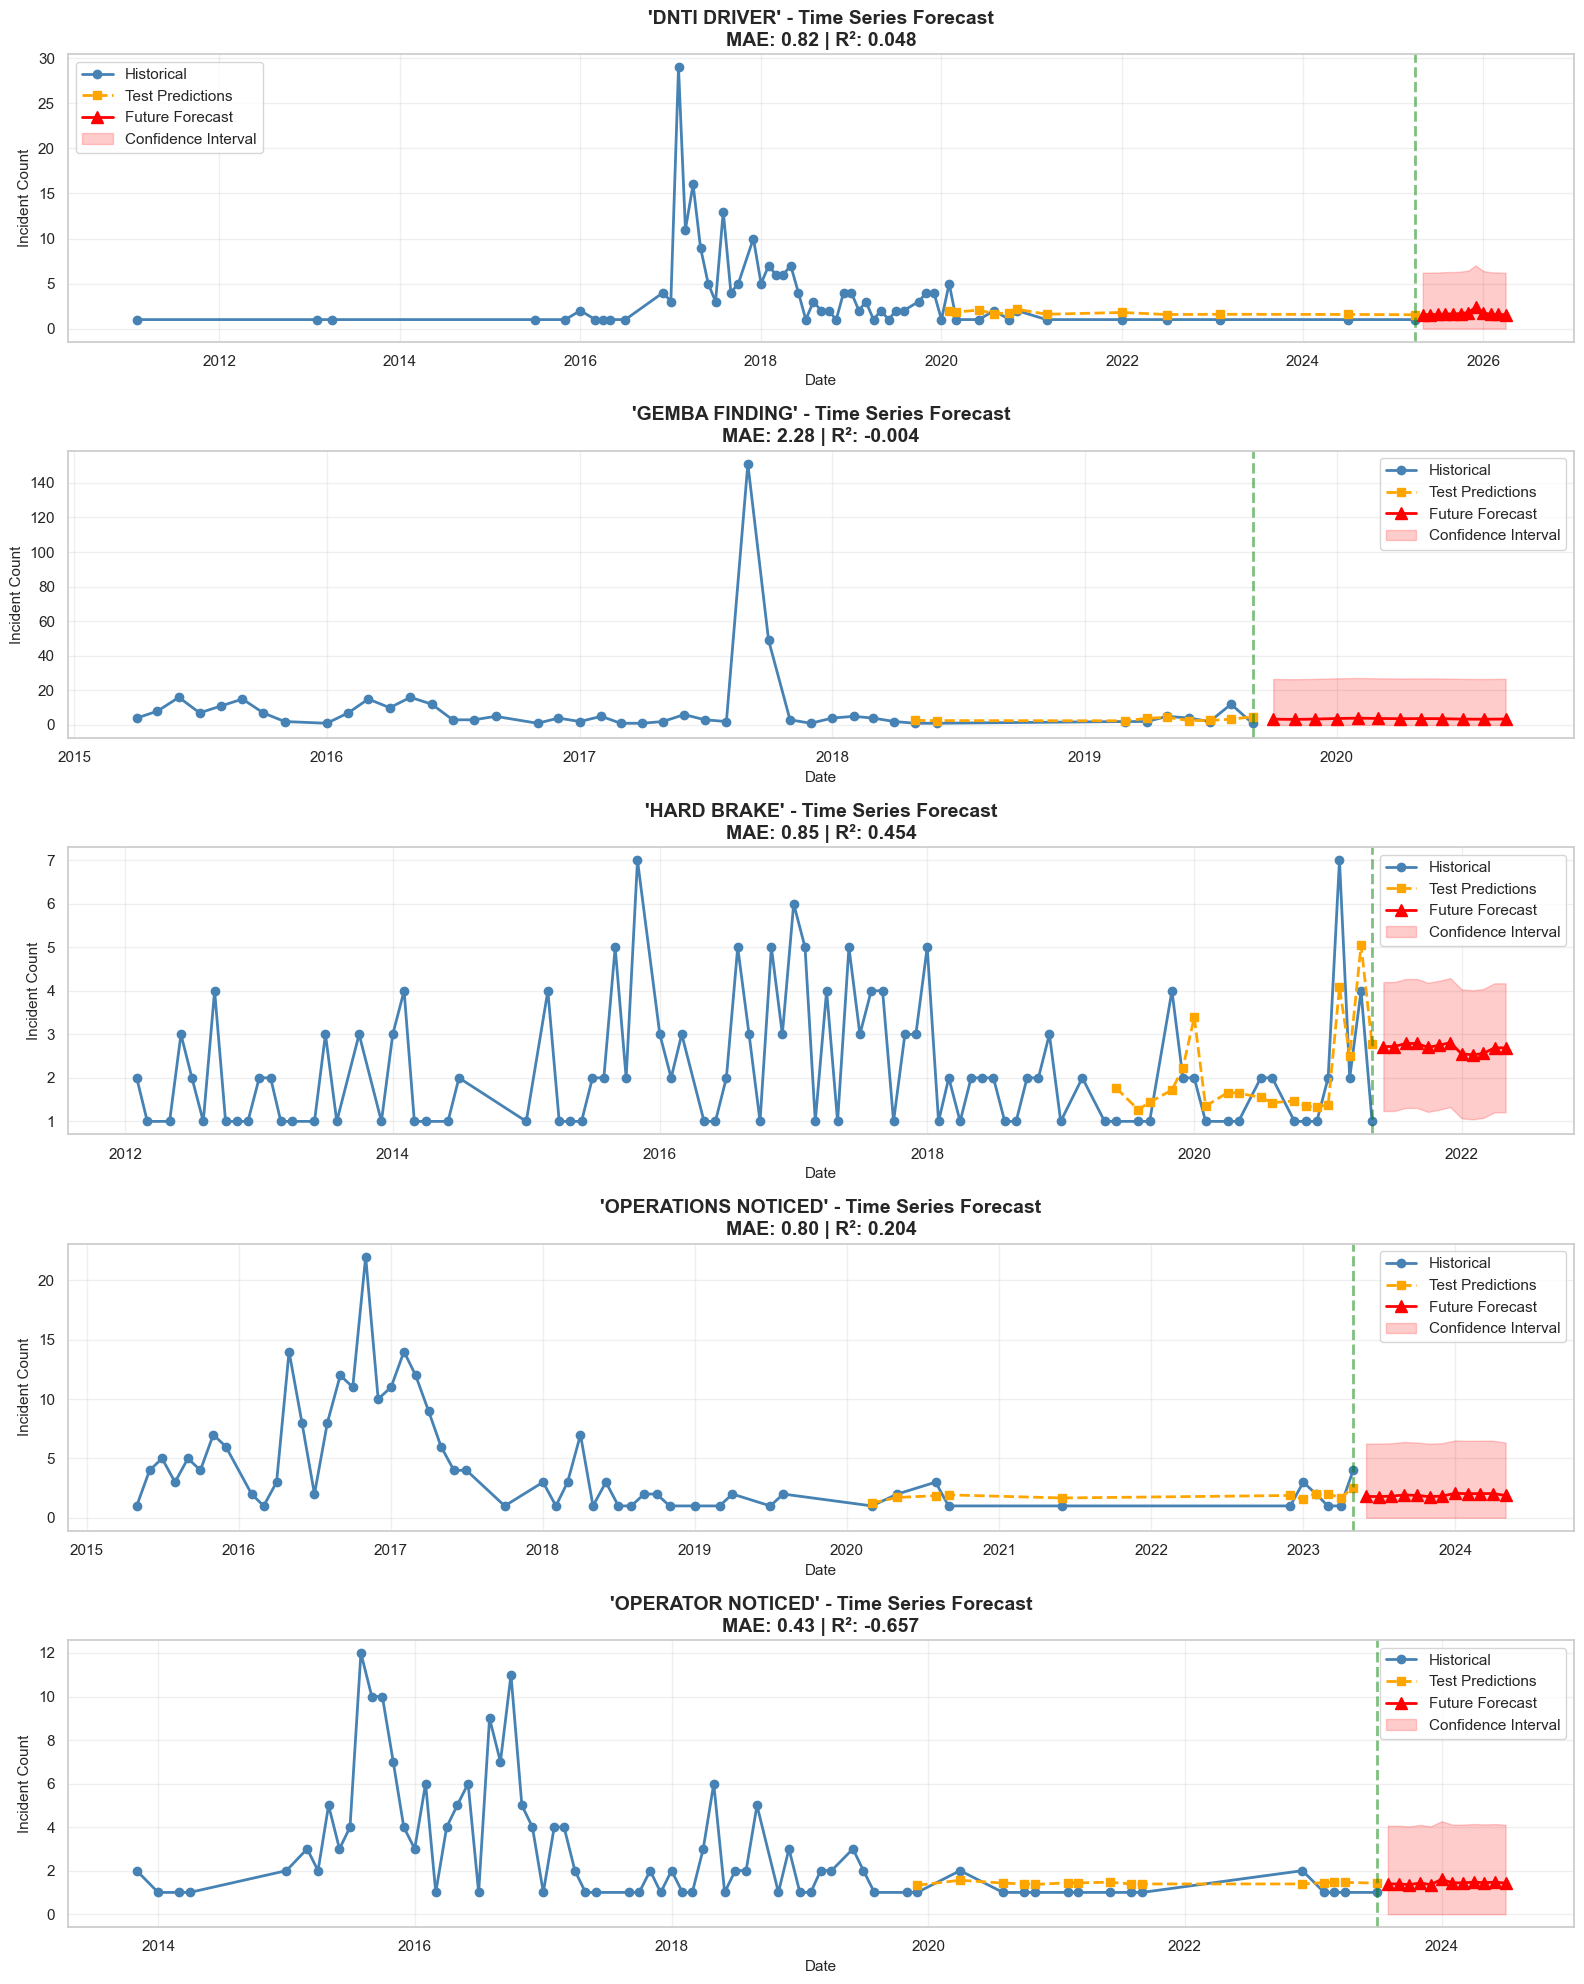


📅 FUTURE PREDICTIONS - NEXT 12 MONTHS

DNTI DRIVER:
--------------------------------------------------------------------------------
  May 2025            : ~ 2 incidents expected
  June 2025           : ~ 2 incidents expected
  July 2025           : ~ 2 incidents expected
  August 2025         : ~ 2 incidents expected
  September 2025      : ~ 2 incidents expected
  October 2025        : ~ 2 incidents expected
  November 2025       : ~ 2 incidents expected
  December 2025       : ~ 2 incidents expected
  January 2026        : ~ 2 incidents expected
  February 2026       : ~ 2 incidents expected
  March 2026          : ~ 2 incidents expected
  April 2026          : ~ 2 incidents expected

GEMBA FINDING:
--------------------------------------------------------------------------------
  October 2019        : ~ 3 incidents expected
  November 2019       : ~ 3 incidents expected
  December 2019       : ~ 3 incidents expected
  January 2020        : ~ 4 incidents expected
  February 2020  

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

print("="*100)
print("INCIDENT TIME SERIES FORECASTING")
print("Predicting WHEN incidents will happen (with counts and dates)")
print("="*100)

# Load data
df = pd.read_excel('Incidents.xlsx')

date_columns = [col for col in df.columns if 'date' in col.lower()]
desc_columns = [col for col in df.columns if 'desc' in col.lower() or 'brief' in col.lower()]

incident_date_col = 'Incident Date' if 'Incident Date' in df.columns else date_columns[0]
brief_desc_col = 'Brief Description' if 'Brief Description' in df.columns else desc_columns[0]

df[incident_date_col] = pd.to_datetime(df[incident_date_col], errors='coerce')
df = df.dropna(subset=[incident_date_col])

print(f"✓ Loaded {len(df)} incidents from {df[incident_date_col].min()} to {df[incident_date_col].max()}")

# Extract top 5 incident types (bigrams)
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=5)
X = vectorizer.fit_transform(df[brief_desc_col].fillna(''))
top_bigrams = vectorizer.get_feature_names_out()

print(f"\n📊 Tracking top 5 incident types: {list(top_bigrams)}")

# Classify incidents
def get_primary_bigram(text):
    if pd.isna(text):
        return 'other'
    text = str(text).lower()
    for bigram in top_bigrams:
        if bigram in text:
            return bigram
    return 'other'

df['incident_type'] = df[brief_desc_col].apply(get_primary_bigram)
df = df[df['incident_type'] != 'other']

# Create monthly time series for each incident type
df['YearMonth'] = df[incident_date_col].dt.to_period('M')

# Count incidents per month per type
monthly_counts = df.groupby(['YearMonth', 'incident_type']).size().reset_index(name='count')
monthly_counts['YearMonth'] = monthly_counts['YearMonth'].dt.to_timestamp()

print(f"\n✓ Created monthly time series with {len(monthly_counts)} data points")

# ======================== FORECASTING FOR EACH INCIDENT TYPE ========================
print("\n🔮 Building forecasting models for each incident type...")

fig, axes = plt.subplots(len(top_bigrams), 1, figsize=(16, 4*len(top_bigrams)))
if len(top_bigrams) == 1:
    axes = [axes]

predictions_summary = []

for idx, incident_type in enumerate(top_bigrams):
    print(f"\n  {'='*80}")
    print(f"  Forecasting: '{incident_type}'")
    print(f"  {'='*80}")
    
    # Filter data for this incident type
    type_data = monthly_counts[monthly_counts['incident_type'] == incident_type].copy()
    type_data = type_data.sort_values('YearMonth')
    
    if len(type_data) < 12:
        print(f"  ⚠️ Not enough data for {incident_type} (only {len(type_data)} months)")
        continue
    
    # Create features: year, month, rolling averages
    type_data['year'] = type_data['YearMonth'].dt.year
    type_data['month'] = type_data['YearMonth'].dt.month
    type_data['quarter'] = type_data['YearMonth'].dt.quarter
    type_data['days_since_start'] = (type_data['YearMonth'] - type_data['YearMonth'].min()).dt.days
    
    # Rolling features
    type_data['rolling_mean_3'] = type_data['count'].rolling(window=3, min_periods=1).mean()
    type_data['rolling_mean_6'] = type_data['count'].rolling(window=6, min_periods=1).mean()
    type_data['lag_1'] = type_data['count'].shift(1).fillna(type_data['count'].mean())
    type_data['lag_3'] = type_data['count'].shift(3).fillna(type_data['count'].mean())
    
    # Prepare features and target
    feature_cols = ['year', 'month', 'quarter', 'days_since_start', 
                    'rolling_mean_3', 'rolling_mean_6', 'lag_1', 'lag_3']
    
    X = type_data[feature_cols].values
    y = type_data['count'].values
    
    # Train/test split (last 20% for testing)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    dates_train = type_data['YearMonth'].iloc[:split_idx]
    dates_test = type_data['YearMonth'].iloc[split_idx:]
    
    # Train model
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred_test = model.predict(X_test)
    y_pred_test = np.maximum(y_pred_test, 0)  # No negative predictions
    
    # Metrics
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2 = r2_score(y_test, y_pred_test)
    
    print(f"  Model Performance:")
    print(f"    MAE:  {mae:.2f} incidents/month")
    print(f"    RMSE: {rmse:.2f}")
    print(f"    R²:   {r2:.3f}")
    
    # Forecast next 12 months
    last_date = type_data['YearMonth'].max()
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')
    
    future_features = []
    for future_date in future_dates:
        # Get recent data for rolling features
        recent_data = type_data.tail(6).copy()
        
        future_row = {
            'year': future_date.year,
            'month': future_date.month,
            'quarter': (future_date.month - 1) // 3 + 1,
            'days_since_start': (future_date - type_data['YearMonth'].min()).days,
            'rolling_mean_3': recent_data['count'].tail(3).mean(),
            'rolling_mean_6': recent_data['count'].tail(6).mean(),
            'lag_1': recent_data['count'].iloc[-1] if len(recent_data) > 0 else type_data['count'].mean(),
            'lag_3': recent_data['count'].iloc[-3] if len(recent_data) >= 3 else type_data['count'].mean()
        }
        future_features.append([future_row[col] for col in feature_cols])
    
    X_future = np.array(future_features)
    y_future = model.predict(X_future)
    y_future = np.maximum(y_future, 0)
    
    # Store predictions
    for date, pred in zip(future_dates, y_future):
        predictions_summary.append({
            'incident_type': incident_type,
            'date': date,
            'predicted_count': int(round(pred))
        })
    
    # Visualization
    ax = axes[idx]
    
    # Plot historical data
    ax.plot(type_data['YearMonth'], type_data['count'], 
            'o-', label='Historical', color='steelblue', linewidth=2, markersize=6)
    
    # Plot test predictions
    ax.plot(dates_test, y_pred_test, 
            's--', label='Test Predictions', color='orange', linewidth=2, markersize=6)
    
    # Plot future predictions
    ax.plot(future_dates, y_future, 
            '^-', label='Future Forecast', color='red', linewidth=2, markersize=8)
    
    # Add confidence interval (simple ±1 std)
    std = type_data['count'].std()
    ax.fill_between(future_dates, 
                     np.maximum(y_future - std, 0), 
                     y_future + std, 
                     alpha=0.2, color='red', label='Confidence Interval')
    
    # Formatting
    ax.set_title(f"'{incident_type.upper()}' - Time Series Forecast\n"
                 f"MAE: {mae:.2f} | R²: {r2:.3f}", 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Date', fontsize=11)
    ax.set_ylabel('Incident Count', fontsize=11)
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.axvline(x=last_date, color='green', linestyle='--', alpha=0.5, linewidth=2, label='Today')

plt.tight_layout()
plt.show()

# ======================== SUMMARY TABLE ========================
print("\n" + "="*100)
print("📅 FUTURE PREDICTIONS - NEXT 12 MONTHS")
print("="*100)

predictions_df = pd.DataFrame(predictions_summary)

for incident_type in top_bigrams:
    type_preds = predictions_df[predictions_df['incident_type'] == incident_type]
    if len(type_preds) == 0:
        continue
    
    print(f"\n{incident_type.upper()}:")
    print("-"*80)
    for _, row in type_preds.iterrows():
        month_name = row['date'].strftime('%B %Y')
        count = row['predicted_count']
        print(f"  {month_name:20s}: ~{count:2d} incidents expected")

# Find peak months
print("\n" + "="*100)
print("⚠️  PEAK RISK MONTHS (Highest predicted incident counts)")
print("="*100)

peak_months = predictions_df.groupby('date')['predicted_count'].sum().reset_index()
peak_months = peak_months.sort_values('predicted_count', ascending=False).head(5)

for idx, row in peak_months.iterrows():
    month_name = row['date'].strftime('%B %Y')
    count = int(row['predicted_count'])
    print(f"  {month_name}: {count} total incidents predicted")

print("\n" + "="*100)
print("✅ FORECASTING COMPLETE!")
print("="*100)

FUTURE INCIDENT PREDICTIONS - NEXT 12 MONTHS

✓ Analyzing top 5 incident types: ['dnti driver', 'gemba finding', 'hard brake', 'operations noticed', 'operator noticed']

📊 Creating future predictions visualization...



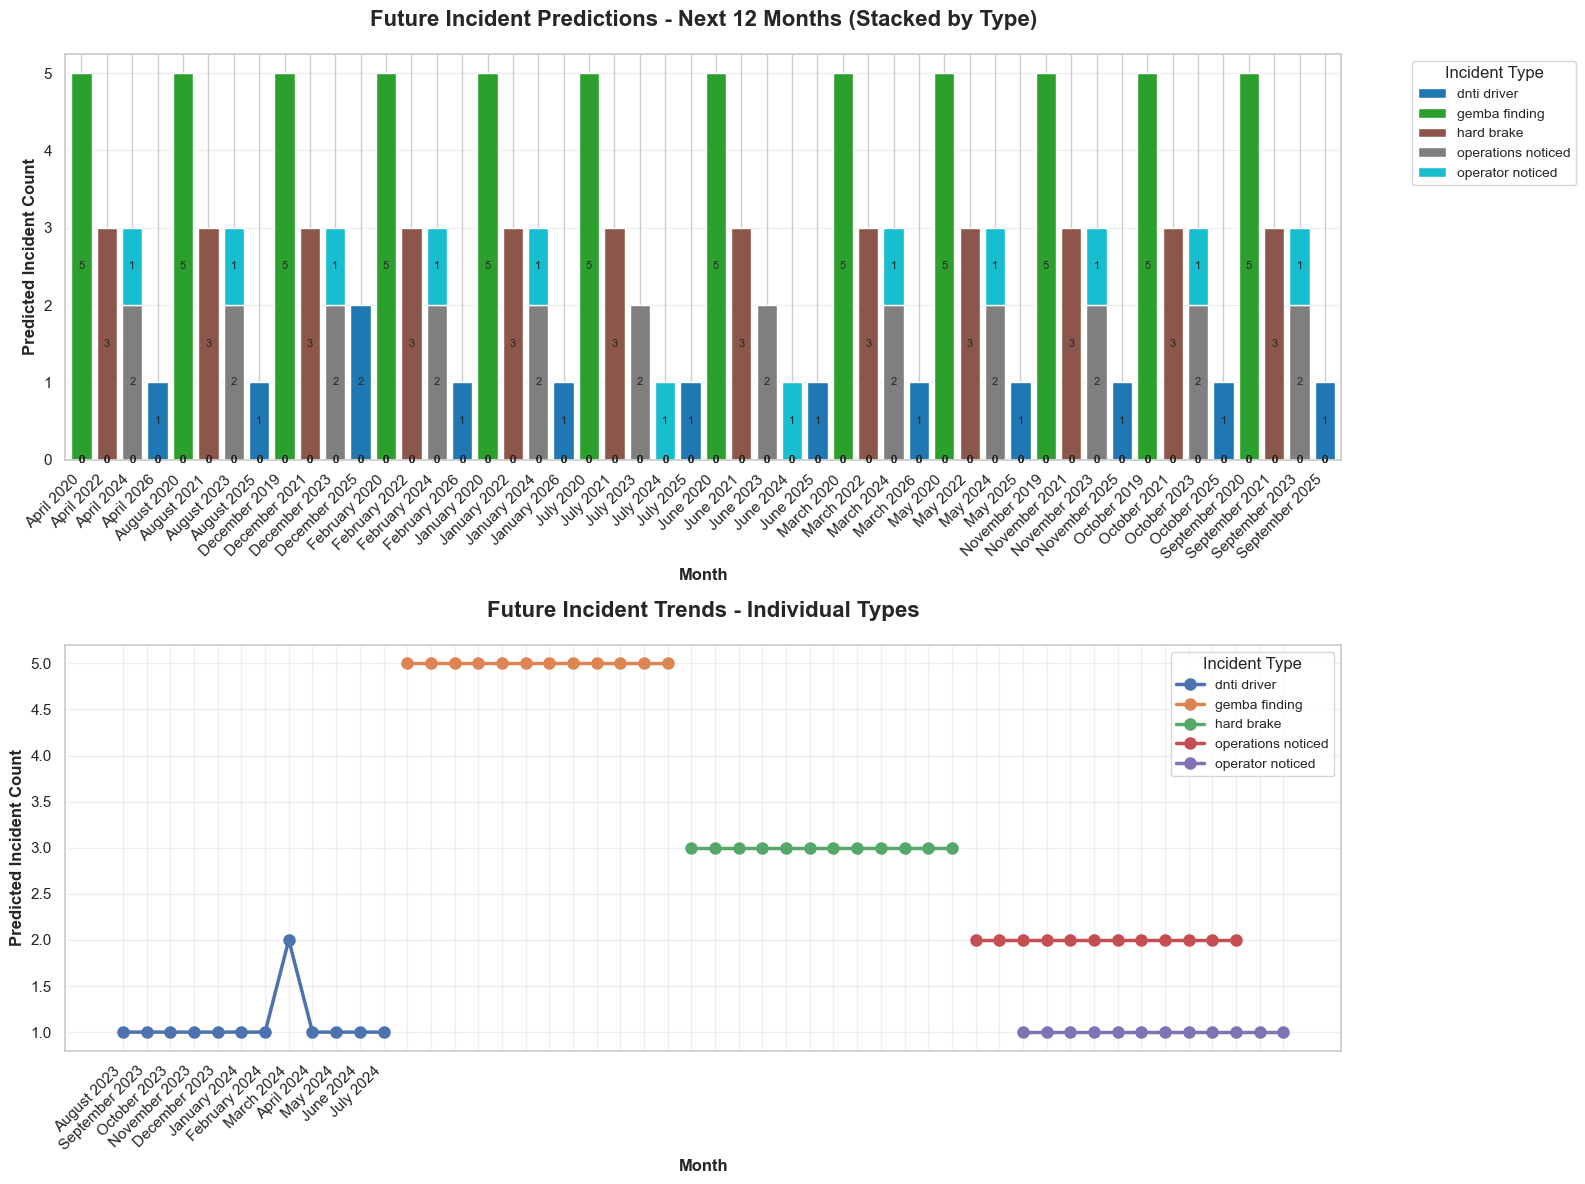


📅 DETAILED PREDICTIONS BY INCIDENT TYPE

🔧 DNTI DRIVER
   Total Expected: 13 incidents over next 12 months
   Peak Month: December 2025 (2 incidents)
----------------------------------------------------------------------------------------------------
   Month                Expected Incidents  
----------------------------------------------------------------------------------------------------
   May 2025             1     ██
   June 2025            1     ██
   July 2025            1     ██
   August 2025          1     ██
   September 2025       1     ██
   October 2025         1     ██
   November 2025        1     ██
   December 2025        2     ████
   January 2026         1     ██
   February 2026        1     ██
   March 2026           1     ██
   April 2026           1     ██


🔧 GEMBA FINDING
   Total Expected: 60 incidents over next 12 months
   Peak Month: October 2019 (5 incidents)
--------------------------------------------------------------------------------------------

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

print("="*100)
print("FUTURE INCIDENT PREDICTIONS - NEXT 12 MONTHS")
print("="*100)

# Load data
df = pd.read_excel('Incidents.xlsx')

date_columns = [col for col in df.columns if 'date' in col.lower()]
desc_columns = [col for col in df.columns if 'desc' in col.lower() or 'brief' in col.lower()]

incident_date_col = 'Incident Date' if 'Incident Date' in df.columns else date_columns[0]
brief_desc_col = 'Brief Description' if 'Brief Description' in df.columns else desc_columns[0]

df[incident_date_col] = pd.to_datetime(df[incident_date_col], errors='coerce')
df = df.dropna(subset=[incident_date_col])

# Extract top 5 incident types
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=5)
X = vectorizer.fit_transform(df[brief_desc_col].fillna(''))
top_bigrams = vectorizer.get_feature_names_out()

print(f"\n✓ Analyzing top 5 incident types: {list(top_bigrams)}\n")

# Classify incidents
def get_primary_bigram(text):
    if pd.isna(text):
        return 'other'
    text = str(text).lower()
    for bigram in top_bigrams:
        if bigram in text:
            return bigram
    return 'other'

df['incident_type'] = df[brief_desc_col].apply(get_primary_bigram)
df = df[df['incident_type'] != 'other']
df['YearMonth'] = df[incident_date_col].dt.to_period('M')

# Count incidents per month per type
monthly_counts = df.groupby(['YearMonth', 'incident_type']).size().reset_index(name='count')
monthly_counts['YearMonth'] = monthly_counts['YearMonth'].dt.to_timestamp()

# Build models and forecast
all_predictions = []

for incident_type in top_bigrams:
    type_data = monthly_counts[monthly_counts['incident_type'] == incident_type].copy()
    type_data = type_data.sort_values('YearMonth')
    
    if len(type_data) < 12:
        continue
    
    # Create features
    type_data['year'] = type_data['YearMonth'].dt.year
    type_data['month'] = type_data['YearMonth'].dt.month
    type_data['quarter'] = type_data['YearMonth'].dt.quarter
    type_data['days_since_start'] = (type_data['YearMonth'] - type_data['YearMonth'].min()).dt.days
    type_data['rolling_mean_3'] = type_data['count'].rolling(window=3, min_periods=1).mean()
    type_data['rolling_mean_6'] = type_data['count'].rolling(window=6, min_periods=1).mean()
    type_data['lag_1'] = type_data['count'].shift(1).fillna(type_data['count'].mean())
    
    feature_cols = ['year', 'month', 'quarter', 'days_since_start', 
                    'rolling_mean_3', 'rolling_mean_6', 'lag_1']
    
    X = type_data[feature_cols].values
    y = type_data['count'].values
    
    # Train model
    model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    model.fit(X, y)
    
    # Forecast next 12 months
    last_date = type_data['YearMonth'].max()
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=12, freq='MS')
    
    for future_date in future_dates:
        recent_data = type_data.tail(6)
        
        future_row = {
            'year': future_date.year,
            'month': future_date.month,
            'quarter': (future_date.month - 1) // 3 + 1,
            'days_since_start': (future_date - type_data['YearMonth'].min()).days,
            'rolling_mean_3': recent_data['count'].tail(3).mean(),
            'rolling_mean_6': recent_data['count'].tail(6).mean(),
            'lag_1': recent_data['count'].iloc[-1] if len(recent_data) > 0 else type_data['count'].mean()
        }
        
        X_future = np.array([[future_row[col] for col in feature_cols]])
        prediction = model.predict(X_future)[0]
        prediction = max(0, int(round(prediction)))
        
        all_predictions.append({
            'Incident Type': incident_type,
            'Date': future_date,
            'Month': future_date.strftime('%B %Y'),
            'Predicted Count': prediction
        })

# Create DataFrame
predictions_df = pd.DataFrame(all_predictions)

# ======================== VISUALIZATION 1: STACKED BAR CHART ========================
print("📊 Creating future predictions visualization...\n")

# Pivot for stacked bar chart
pivot_df = predictions_df.pivot(index='Month', columns='Incident Type', values='Predicted Count').fillna(0)

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot 1: Stacked Bar Chart
ax1 = axes[0]
pivot_df.plot(kind='bar', stacked=True, ax=ax1, colormap='tab10', width=0.8)
ax1.set_title('Future Incident Predictions - Next 12 Months (Stacked by Type)', 
              fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.set_ylabel('Predicted Incident Count', fontsize=12, fontweight='bold')
ax1.legend(title='Incident Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xticklabels(pivot_df.index, rotation=45, ha='right')

# Add value labels on bars
for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fontsize=8, fmt='%.0f')

# Plot 2: Line Chart by Type
ax2 = axes[1]
for incident_type in top_bigrams:
    type_data = predictions_df[predictions_df['Incident Type'] == incident_type]
    ax2.plot(type_data['Month'], type_data['Predicted Count'], 
             marker='o', linewidth=2.5, markersize=8, label=incident_type)

ax2.set_title('Future Incident Trends - Individual Types', 
              fontsize=16, fontweight='bold', pad=20)
ax2.set_xlabel('Month', fontsize=12, fontweight='bold')
ax2.set_ylabel('Predicted Incident Count', fontsize=12, fontweight='bold')
ax2.legend(title='Incident Type', loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_xticklabels(type_data['Month'].unique(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# ======================== TABLE OUTPUT ========================
print("\n" + "="*100)
print("📅 DETAILED PREDICTIONS BY INCIDENT TYPE")
print("="*100)

for incident_type in top_bigrams:
    type_preds = predictions_df[predictions_df['Incident Type'] == incident_type].sort_values('Date')
    
    if len(type_preds) == 0:
        continue
    
    total = type_preds['Predicted Count'].sum()
    peak_month = type_preds.loc[type_preds['Predicted Count'].idxmax(), 'Month']
    peak_count = type_preds['Predicted Count'].max()
    
    print(f"\n🔧 {incident_type.upper()}")
    print(f"   Total Expected: {total} incidents over next 12 months")
    print(f"   Peak Month: {peak_month} ({peak_count} incidents)")
    print("-"*100)
    print(f"   {'Month':<20} {'Expected Incidents':<20}")
    print("-"*100)
    
    for _, row in type_preds.iterrows():
        bar_length = int(row['Predicted Count'] * 2)  # Visual bar
        bar = '█' * bar_length
        print(f"   {row['Month']:<20} {row['Predicted Count']:<5} {bar}")
    print()

# ======================== MONTHLY SUMMARY ========================
print("="*100)
print("📆 MONTHLY SUMMARY - ALL INCIDENT TYPES COMBINED")
print("="*100)

monthly_total = predictions_df.groupby('Month').agg({
    'Predicted Count': 'sum'
}).reset_index()

monthly_total = monthly_total.sort_values('Predicted Count', ascending=False)

print(f"\n{'Month':<20} {'Total Predicted Incidents':<25} {'Risk Level':<15}")
print("-"*100)

for _, row in monthly_total.iterrows():
    total = row['Predicted Count']
    if total >= 20:
        risk = "🔴 HIGH"
    elif total >= 10:
        risk = "🟡 MEDIUM"
    else:
        risk = "🟢 LOW"
    
    bar_length = int(total / 2)
    bar = '█' * bar_length
    print(f"{row['Month']:<20} {int(total):<5} {bar:<20} {risk}")

# ======================== TOP WARNINGS ========================
print("\n" + "="*100)
print("⚠️  KEY INSIGHTS - PREPARE FOR THESE")
print("="*100)

# Find top 3 highest risk months
top_3_months = monthly_total.head(3)

print("\n🔴 HIGHEST RISK MONTHS:")
for idx, row in top_3_months.iterrows():
    month = row['Month']
    total = int(row['Predicted Count'])
    
    # What types will spike?
    month_details = predictions_df[predictions_df['Month'] == month].sort_values('Predicted Count', ascending=False)
    top_types = month_details.head(2)
    
    print(f"\n  {month}: {total} incidents expected")
    print(f"     Main concerns:")
    for _, detail in top_types.iterrows():
        print(f"       • {detail['Incident Type']}: {detail['Predicted Count']} incidents")

# Export to CSV
predictions_df.to_csv('future_predictions.csv', index=False)
print("\n" + "="*100)
print("✅ Predictions exported to 'future_predictions.csv'")
print("="*100)